# SDOH Analysis (Last Update 11/15)

### Brief Background

SDOH,social determinants of health, are numerous factors that affect the quality of life as well as a wide range of health outcomes for the people who live and work in the places where they live and work.Incorporating SDOH data into research that supports the quality and delivery of health care is important for better understanding the relationships between community-level factors, individual health, and health care quality and delivery. As a result of research, it has been proven that physical environment, housing instability, unemployment, race, and poverty, among others, are all associated with poor health conditions. In New York City, for instance, these factors contribute to neighborhood-level differences in life expectancy by as much as ten years as a result of these factors.

This is analysis report, I will mainly forcus on factors related to SDOH, for example education level, access to wrok and other factors might affect or related to it to discover how the situation is. And do some deeper analysis by modeling and exam effects of certain feather. For example, whether people have high education background cares more about health issue; If family a big factor affect the health issue, etc.



### Data Set & Analysis Report Structure

The analysis is based on several data sets: PRAPARE Report, Ooutcomes Summary, and other helpful datas like demographics(From Core) functional as additional information.

The other dataset for SDOH analysis is from AHRQ(Agency for Healthcare Research and Quality)
https://www.ahrq.gov/sdoh/data-analytics/sdoh-data.html#download

The dataset contains 85529 data points covered from 2009 to 2020.

PRAPARE Report: (From Izenda)This is a survey based or inclined data set, containing 721 rows and 25 columns. Every row represent one response of the survey and every column is one of the question of the survey. There is only 653 unique clients. The way to drop duplicate is to keep the most recent one and drop the older one. 

Outcomes Summary(From Izenda): This dataset contains more than 13,300 rows and 21 columns. It stores different responses by different client to the survey reflecting the background and personal condition of each client. Note the data sets contain duplicates. They way to drop duplicate is to keep the most recent one and drop the older one.

The analysis will start at data processing and preparing to EDA known as exploratory data analysis. And then follow by the deeper analysis with models. 


## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot

## Part 1 Data Processing and Preparing

In [2]:
# Load all data sets
pra = pd.read_csv('PRAPARE Report.csv')
demo = pd.read_excel('Demographics.xlsx')
out = pd.read_excel('Outcomes Summary.xlsx')

In [3]:
# Drop Duplicates and keep all unique clients
# Keep the most recent data
dup1 = pra['Client ID'].duplicated(keep = 'last')
pra['Client ID'].iloc[dup1[dup1].index]
pra.drop(dup1[dup1].index, axis=0, inplace=True)

In [4]:
pra.head()

,Client ID,Last Name,First Name,Location Name,Are you Hispanic or Latino?,Which race are you?,Migrant Work?,Armed Forces?,Language,Family Members,...,Insurance,Income,Needs,Talk,Stress,Refugee,Safe,Partner,Transport,Total Score
0,2,WATSON,SANDRA,Milestone SH (100 Beds),No,Black/African American,No,No,English,1,...,Medicaid,"Less than $24,999",No unmet needs,3 to 5 times a week,A little bit,No,Unsure,No,No,46
1,3317,Patton,Mary,Queens SH I - 653,No,Black/African American,No,No,English,0,...,Medicaid,"$25,000 - $49,999",No unmet needs,Less than once a week,Somewhat,No,No,No,No,46
2,4360,RODRIGUEZ,EMMANUEL,Queens SH III POP A - 654,Yes,I choose not to answer this question,No,No,English,1,...,Medicare,"Less than $24,999",No unmet needs,Less than once a week,A little bit,No,No,No,No,52
3,4361,Litvyakov,Sergey,Lewis Ave Supported Housing,No,White,No,No,English,1,...,Medicare,"Less than $24,999",No unmet needs,3 to 5 times a week,Quite a bit,No,Yes,No,No,51
4,4363,MABERY,SHANINE,ADULT HOME HOME SHP (62 BED),No,Black/African American,No,No,English,1,...,Medicaid,"Less than $24,999",No unmet needs,1 or 2 times a week,Not at all,No,Yes,No,No,45


In [5]:
# Keep all needed variables
demo = demo[['CLIENTID','DATEOFBIRTH','GENDER','AGE']]

# Drop Duplicates and keep all unique clients
# Keep the most recent data
demo = demo.drop_duplicates()
demo.head()

,CLIENTID,DATEOFBIRTH,GENDER,AGE
0,2.0,1958-09-23,Female,64.0
2,3.0,1958-01-23,Female,64.0
4,4.0,1989-11-02,Male,33.0
5,5.0,1968-06-19,Female,54.0
7,6.0,1967-06-15,Female,55.0


In [6]:
# Creating new feature naming Generation indicating which generation the client belongs to
# Generating generation intervels
The_Greatest_Generation_S = pd.Timestamp('1901-01-01')
The_Greatest_Generation_E = pd.Timestamp('1924-12-31')
The_Slient_Generation_S = pd.Timestamp('1928-01-01')
The_Slient_Generation_E = pd.Timestamp('1945-12-31')
Baby_Boom_Generation_S = pd.Timestamp('1946-01-01')
Baby_Boom_Generation_E = pd.Timestamp('1964-12-31')
Generation_X_S = pd.Timestamp('1965-01-01')
Generation_X_E = pd.Timestamp('1980-12-31')
Generation_Y_S = pd.Timestamp('1981-01-01')
Generation_Y_E = pd.Timestamp('1996-12-31')
Generation_Z_S = pd.Timestamp('1997-01-01')
Generation_Z_E = pd.Timestamp('2010-12-31')

# Function assign each client a generation based on the birthday 
def generation(x):
    result = []
    for i in x:
        if i > The_Greatest_Generation_S and i <= The_Greatest_Generation_E:
            result.append('The_Greatest_Generation')
        elif i > The_Slient_Generation_S and i <= The_Slient_Generation_E:
            result.append('The_Slient_Generation')
        elif i > Baby_Boom_Generation_S and i <= Baby_Boom_Generation_E:
            result.append('Baby_Boom_Generation')
        elif i > Generation_X_S and i <= Generation_X_E:
            result.append('Generation_X')
        elif i > Generation_Y_S and i <= Generation_Y_E:
            result.append('Generation_Y')
        elif i > Generation_Z_S and i <= Generation_Z_E:
            result.append('Generation_Z')
        else:
            result.append('Generation Alpha')
    return result

In [7]:
# Creating new feature naming generation
demo['Generation'] = generation(demo['DATEOFBIRTH'])

# Rename the col so as to merge later
demo = demo.rename(columns={'CLIENTID':'Client ID'})
demo.head()

,Client ID,DATEOFBIRTH,GENDER,AGE,Generation
0,2.0,1958-09-23,Female,64.0,Baby_Boom_Generation
2,3.0,1958-01-23,Female,64.0,Baby_Boom_Generation
4,4.0,1989-11-02,Male,33.0,Generation_Y
5,5.0,1968-06-19,Female,54.0,Generation_X
7,6.0,1967-06-15,Female,55.0,Generation_X


In [8]:
# Merge demographics info to PRAPARE dataset
pra_new = pd.merge(pra, demo, how="left", on=['Client ID'])
pra_new.head()

,Client ID,Last Name,First Name,Location Name,Are you Hispanic or Latino?,Which race are you?,Migrant Work?,Armed Forces?,Language,Family Members,...,Stress,Refugee,Safe,Partner,Transport,Total Score,DATEOFBIRTH,GENDER,AGE,Generation
0,2,WATSON,SANDRA,Milestone SH (100 Beds),No,Black/African American,No,No,English,1,...,A little bit,No,Unsure,No,No,46,1958-09-23,Female,64.0,Baby_Boom_Generation
1,3317,Patton,Mary,Queens SH I - 653,No,Black/African American,No,No,English,0,...,Somewhat,No,No,No,No,46,1965-05-05,Female,57.0,Generation_X
2,4360,RODRIGUEZ,EMMANUEL,Queens SH III POP A - 654,Yes,I choose not to answer this question,No,No,English,1,...,A little bit,No,No,No,No,52,1963-05-23,Male,59.0,Baby_Boom_Generation
3,4361,Litvyakov,Sergey,Lewis Ave Supported Housing,No,White,No,No,English,1,...,Quite a bit,No,Yes,No,No,51,1975-07-04,Male,47.0,Generation_X
4,4363,MABERY,SHANINE,ADULT HOME HOME SHP (62 BED),No,Black/African American,No,No,English,1,...,Not at all,No,Yes,No,No,45,1975-02-03,Female,47.0,Generation_X


In [9]:
# Drop Duplicates and keep all unique clients
# Keep the most recent data

# Sort the data based on the date completed and client id
out = out.sort_values(by=['CLIENT ID','DATE COMPLETED'])

dup2 = out['CLIENT ID'].duplicated(keep = 'last')
out.drop(dup2[dup2].index, axis=0, inplace=True)
out = out.dropna(thresh = 5)

# Rename the col so as to merge later
out = out.rename(columns={'CLIENT ID':'Client ID'})
# Merge the data
out_new = pd.merge(out, demo, how="left", on=['Client ID'])
out_new.head()

,Client ID,CLIENT NAME,DATE OF BIRTH,LOCATION NAME,MIC#,DATE COMPLETED,POINT OF SERVICE,1. CURRENTLY EMPLOYED,2. INTERESTED IN WORKING?,3. ESTABLISH AN EMPLOYMENT GOAL AT THIS TIME?,...,9. CONNECTED TO FAMILY?,10. CONNECTED TO FRIENDS?,11. ENGAGED WITH MH TREATMENT?,12. CONNECTED TO PRIMARY CARE?,"13. PARTICIPATES IN COMMUNITY ACTIVITIES : LEISURE, SPORTS, SPIRITUAL, VOLUNTEER WORK?","IF YES, PLEASE LIST THE ACTIVITIES THAT YOU ENJOY",DATEOFBIRTH,GENDER,AGE,Generation
0,2,"WATSON, SANDRA",1958-09-23,Milestone SH (100 Beds),NaN,2022-04-01 00:00:00,Update,Yes,Yes,Yes,...,Yes,No,Yes,Yes,No,NaN,1958-09-23,Female,64.0,Baby_Boom_Generation
1,5,"PERSAD, KAMLAWATIE",1968-06-19,Milestone SH (100 Beds),NaN,2022-04-01 00:00:00,Update,No,No,No,...,Yes,No,Yes,Yes,No,NaN,1968-06-19,Female,54.0,Generation_X
2,6,"SMITH, WENDY",1967-06-15,Emerson Scattersite OMH SH - 643,NaN,2021-08-10 00:00:00,Update,No,No,No,...,Yes,No,No,Yes,No,NaN,1967-06-15,Female,55.0,Generation_X
3,1171,"Knight, Omar",1972-04-09,Brooklyn TAP I - 72 Beds,NaN,2022-08-08 00:00:00,Update,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,No,NaN,1972-04-09,Male,50.0,Generation_X
4,1256,"BROWN, ANGELIQUE",1973-06-26,Rockaway Parkway Center - Clinic,NaN,2022-09-07 00:00:00,Update,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Crafting,1973-06-26,Female,49.0,Generation_X


In [10]:
# for our purpose, we only extract data in following columns
# 'Family Members' + 'Talk': people who have family members and are open to communication tend to bear less pressure
# 'HousingWorry' + 'Work' + 'Income': stress and sense of safety can vary based on these categories often 
pra_new2 = pra_new[['Family Members', 'HousingWorry', 'Work', 'Income', 'Talk', 'Stress', 'Safe']]
pra_new2.head()

,Family Members,HousingWorry,Work,Income,Talk,Stress,Safe
0,1,No,Unemployed and seeking work,"Less than $24,999",3 to 5 times a week,A little bit,Unsure
1,0,No,Part-time or Temporary Work,"$25,000 - $49,999",Less than once a week,Somewhat,No
2,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",Less than once a week,A little bit,No
3,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",3 to 5 times a week,Quite a bit,Yes
4,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",1 or 2 times a week,Not at all,Yes


In [11]:
# convert all data to numbers for later use, standard of issues may change
# set the datas with serious issues to obtain value 1

def housingworry(x):
    result = []
    for element in x:
        if 'Yes' in element:
            result.append(1)
        elif 'No' in element:
            result.append(0)
        else:
            result.append(0.5)
    return result

def work(x):
    result = []
    for element in x:
        if 'Unemployed' in element:
            result.append(1)
        elif 'choose' in element:
            result.append(0.5)
        else:
            result.append(0)
    return result

def talk(x):
    result = []
    for element in x:
        if 'Less' in element or '1' in element:
            result.append(1)
        elif 'choose' in element:
            result.append(0.5)
        else:
            result.append(0)
    return result

def family(x):
    result = []
    for element in x:
        if str(element) == '':
            result.append(1)
        elif 'self' in str(element):
            result.append(1)
        elif 'Self' in str(element):
            result.append(1)
        elif '0' in str(element) or '1' in str(element):
            result.append(1)
        else:
            result.append(0)

    return result



pra_new2['HousingWorry_num'] = housingworry(pra_new2['HousingWorry'])
pra_new2['Work_num'] = work(pra_new2['Work'])
pra_new2['Income_num'] = pra_new2['Income'].apply(lambda x: 1 if 'Less' in x else 0)
pra_new2['Talk_num'] = talk(pra_new2['Talk'])
pra_new2['Stress_num'] = pra_new2['Stress'].apply(lambda x: 1 if 'Quite' in x or 'Very' in x else 0)
pra_new2['Safe_num'] = pra_new2['Safe'].apply(lambda x: 0 if 'Yes' in x else 1)
pra_new2['family_num'] = family(pra_new2['Family Members'])
pra_new2 = pra_new2.drop(['Family Members', 'HousingWorry', 'Work', 'Income', 'Talk', 'Stress', 'Safe'], axis=1)

/var/folders/zj/36c7ylwd52b_cccy38ff01sc0000gn/T/ipykernel_6891/2722729996.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pra_new2['HousingWorry_num'] = housingworry(pra_new2['HousingWorry'])
/var/folders/zj/36c7ylwd52b_cccy38ff01sc0000gn/T/ipykernel_6891/2722729996.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pra_new2['Work_num'] = work(pra_new2['Work'])
/var/folders/zj/36c7ylwd52b_cccy38ff01sc0000gn/T/ipykernel_6891/2722729996.py:57: SettingWithCopyWarning: 
A value is trying to be set on a 

In [12]:
# plot
import matplotlib.pyplot as plt
df_safe = pra_new2.where(pra_new2['Safe_num']==1)
df_safe = df_safe.dropna()
print(len(df_safe))

df_stress = pra_new2.where(pra_new2['Stress_num']==1)
df_stress = df_stress.dropna()
print(len(df_stress))


195
128


In [13]:
pra_new3 = pra_new[['Client ID', 'Last Name', 'First Name', 'Family Members', 'HousingWorry', 'Work', 'Income', 'Talk', 'Stress', 'Safe']]

pra_new3['HousingWorry_num'] = housingworry(pra_new3['HousingWorry'])
pra_new3['Work_num'] = work(pra_new3['Work'])
pra_new3['Income_num'] = pra_new3['Income'].apply(lambda x: 1 if 'Less' in x else 0)
pra_new3['Talk_num'] = talk(pra_new3['Talk'])
pra_new3['Stress_num'] = pra_new3['Stress'].apply(lambda x: 1 if 'Quite' in x or 'Very' in x else 0)
pra_new3['Safe_num'] = pra_new3['Safe'].apply(lambda x: 0 if 'Yes' in x else 1)
pra_new3['family_num'] = family(pra_new3['Family Members'])
pra_new3 = pra_new3.drop(['Family Members', 'HousingWorry', 'Work', 'Income', 'Talk', 'Stress', 'Safe'], axis=1)
pra_new3

/var/folders/zj/36c7ylwd52b_cccy38ff01sc0000gn/T/ipykernel_6891/2874739092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pra_new3['HousingWorry_num'] = housingworry(pra_new3['HousingWorry'])
/var/folders/zj/36c7ylwd52b_cccy38ff01sc0000gn/T/ipykernel_6891/2874739092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pra_new3['Work_num'] = work(pra_new3['Work'])
/var/folders/zj/36c7ylwd52b_cccy38ff01sc0000gn/T/ipykernel_6891/2874739092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Client ID,Last Name,First Name,HousingWorry_num,Work_num,Income_num,Talk_num,Stress_num,Safe_num,family_num
0,2,WATSON,SANDRA,0.0,1.0,1,0.0,0,1,1
1,3317,Patton,Mary,0.0,0.0,0,1.0,0,1,1
2,4360,RODRIGUEZ,EMMANUEL,0.0,1.0,1,1.0,0,1,1
3,4361,Litvyakov,Sergey,0.0,1.0,1,0.0,1,0,1
4,4363,MABERY,SHANINE,0.0,1.0,1,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
648,16416,Johnson,Robin,0.0,1.0,1,0.0,1,1,1
649,16447,Bisogno,Thomas,0.0,1.0,1,0.0,0,0,1
650,16480,Grant,Pamela,0.0,1.0,1,1.0,1,1,1
651,16580,DELFINO,LOUIS,0.0,1.0,0,1.0,1,0,1


In [14]:
# divide people into groups where each maintain the ones having most serious problem
df_serious_housing = pra_new3[pra_new3['HousingWorry_num']==1]
print('serious housing count', len(df_serious_housing))
df_serious_work = pra_new3[pra_new3['Work_num']==1]
print('serious work count', len(df_serious_work))
df_serious_income = pra_new3[pra_new3['Income_num']==1]
print('serious income count', len(df_serious_income))
df_serious_talk = pra_new3[pra_new3['Talk_num']==1]
print('serious talk count', len(df_serious_talk))
df_serious_stress = pra_new3[pra_new3['Stress_num']==1]
print('serious stress count', len(df_serious_stress))
df_serious_safe = pra_new3[pra_new3['Safe_num']==1]
print('serious safe count', len(df_serious_safe))
df_serious_family = pra_new3[pra_new3['family_num']==1]
print('serious family count', len(df_serious_family))

serious housing count 74
serious work count 559
serious income count 410
serious talk count 294
serious stress count 128
serious safe count 195
serious family count 594


In [15]:
# for each group of people, analyze their program and location by merging the groups with Demographics_18-10-2022_22332
demo = pd.read_excel('Demographics.xlsx')
demo2 = pd.read_excel('served list all 09302022 (1).xlsx')
# print(demo.columns.tolist())
demo = demo[['CLIENTID', 'CLIENTNAME', 'LOCATIONNAME', 'LOCATIONSTARTDATE', 'LOCATIONENDDATE', 'ZIPCODE']]
demo2 = demo2[['CLIENTID', 'CLIENTNAME', 'LOCATIONNAME', 'LOCATIONFIXED','LOCATIONSTARTDATE', 'TYPEFIXED','LOCATIONENDDATE']]
# demo = demo[pd.notnull(demo['LOCATIONNAME'])]
merge_housing = df_serious_housing.merge(demo2, how='left',left_on='Client ID', right_on='CLIENTID')
merge_work = df_serious_work.merge(demo2, how='left',left_on='Client ID', right_on='CLIENTID')
merge_income = df_serious_income.merge(demo2, how='left',left_on='Client ID', right_on='CLIENTID')
merge_talk = df_serious_talk.merge(demo2, how='left',left_on='Client ID', right_on='CLIENTID')
merge_stress = df_serious_stress.merge(demo2, how='left',left_on='Client ID', right_on='CLIENTID')
merge_safe = df_serious_safe.merge(demo2, how='left',left_on='Client ID', right_on='CLIENTID')
merge_family = df_serious_family.merge(demo2, how='left',left_on='Client ID', right_on='CLIENTID')

In [16]:
# Sort the data based on the date completed and client id(Housing)
merge_housing = merge_housing.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_housing['Client ID'].duplicated(keep = 'last')
merge_housing.drop(dup3[dup3].index, axis=0, inplace=True)
merge_housing = merge_housing.dropna(thresh = 5)

# Sort the data based on the date completed and client id(Work)
merge_work = merge_work.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_work['Client ID'].duplicated(keep = 'last')
merge_work.drop(dup3[dup3].index, axis=0, inplace=True)
merge_work = merge_work.dropna(thresh = 5)

# Sort the data based on the date completed and client id(Income)
merge_income = merge_income.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_income['Client ID'].duplicated(keep = 'last')
merge_income.drop(dup3[dup3].index, axis=0, inplace=True)
merge_income = merge_income.dropna(thresh = 5)

# Sort the data based on the date completed and client id(Talk)
merge_talk = merge_talk.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_talk['Client ID'].duplicated(keep = 'last')
merge_talk.drop(dup3[dup3].index, axis=0, inplace=True)
merge_talk = merge_talk.dropna(thresh = 5)

# Sort the data based on the date completed and client id(Stress)
merge_stress = merge_stress.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_stress['Client ID'].duplicated(keep = 'last')
merge_stress.drop(dup3[dup3].index, axis=0, inplace=True)
merge_stress = merge_stress.dropna(thresh = 5)

# Sort the data based on the date completed and client id(Safe)
merge_safe = merge_safe.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_safe['Client ID'].duplicated(keep = 'last')
merge_safe.drop(dup3[dup3].index, axis=0, inplace=True)
merge_safe = merge_safe.dropna(thresh = 5)

# Sort the data based on the date completed and client id(Family)
merge_family = merge_family.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_family['Client ID'].duplicated(keep = 'last')
merge_family.drop(dup3[dup3].index, axis=0, inplace=True)
merge_family = merge_family.dropna(thresh = 5)

## Part 2 EDA

In this part, I will try to visualize the distribution of a few important variables so as to have a brief understand of the data set

Number of people who have housing:599(91.73%)
Number of people who did not answer:14(2.14%)
Number of people who have no housing:40(6.13%)
Majority people have housing


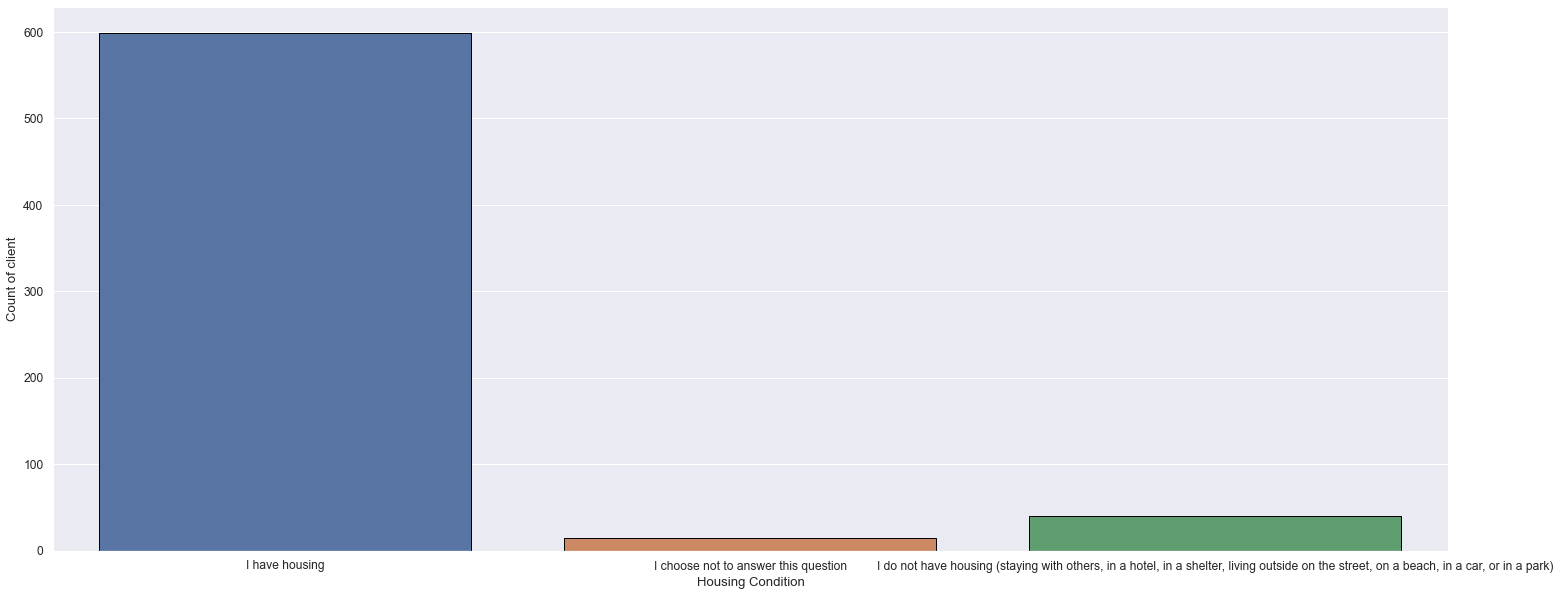

In [17]:
rcParams['figure.figsize'] = 25,10

sns.set(font_scale=1.1)
sns.countplot(data=pra_new, x='Housing',edgecolor = 'black')
plt.xlabel("Housing Condition")
plt.ylabel("Count of client")

# Blue: I have housing
# Orange: I choose not to anser this question
# Green: I do not have housing

print('Number of people who have housing:' + str(len(pra_new[pra_new['Housing'] == 'I have housing'])) + '(' + str(np.round(599/653 *100, 2)) + '%)')
print('Number of people who did not answer:' + str(len(pra_new[pra_new['Housing'] == 'I choose not to answer this question'])) + '(' + str(np.round(14/653 *100, 2)) + '%)')
print('Number of people who have no housing:' + str(len(pra_new[pra_new['Housing'] == 'I do not have housing (staying with others, in a hotel, in a shelter, living outside on the street, on a beach, in a car, or in a park)'])) + '(' + str(np.round(40/653 *100, 2)) + '%)')
print('Majority people have housing')

Number of people who did not worry about housing:544(83.31%)
Number of people who worry abuot housing:74(11.33%)
Number of people who did not answer:35(5.36%)
Majority people have no worry about housing, which is consistent with housing condition


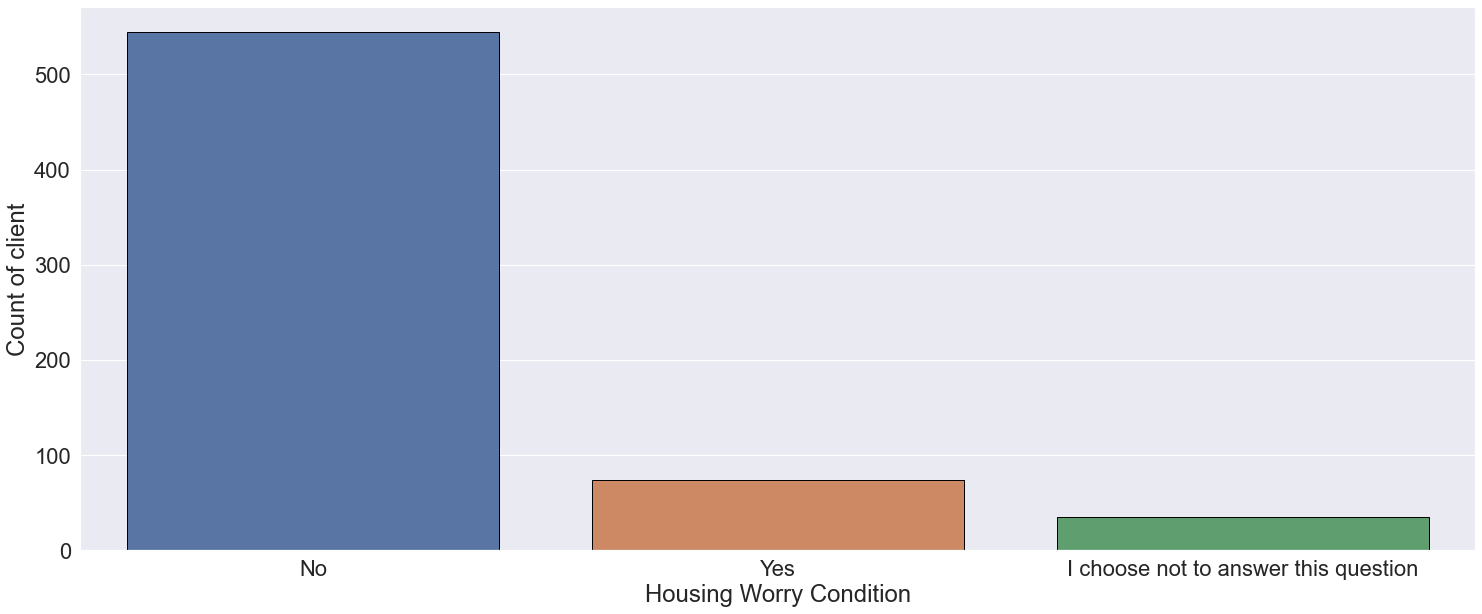

In [18]:
sns.set(font_scale=2)
sns.countplot(data=pra_new, x='HousingWorry',edgecolor = 'black')
plt.xlabel("Housing Worry Condition")
plt.ylabel("Count of client")


print('Number of people who did not worry about housing:' + str(len(pra_new[pra_new['HousingWorry'] == 'No'])) + '(' + str(np.round(544/653 *100, 2)) + '%)')
print('Number of people who worry abuot housing:' + str(len(pra_new[pra_new['HousingWorry'] == 'Yes'])) + '(' + str(np.round(74/653 *100, 2)) + '%)')
print('Number of people who did not answer:' + str(len(pra_new[pra_new['HousingWorry'] == 'I choose not to answer this question'])) + '(' + str(np.round(35/653 *100, 2)) + '%)')
print('Majority people have no worry about housing, which is consistent with housing condition')

Number of people who received Less than high school degree:218(33.38%)
Number of people who received High school diploma or GED:245(37.52%)
Number of people who did not answer:40(6.13%)
Number of people who received more than high school:150(22.97%)
More than 70% of people received education at high school or lower


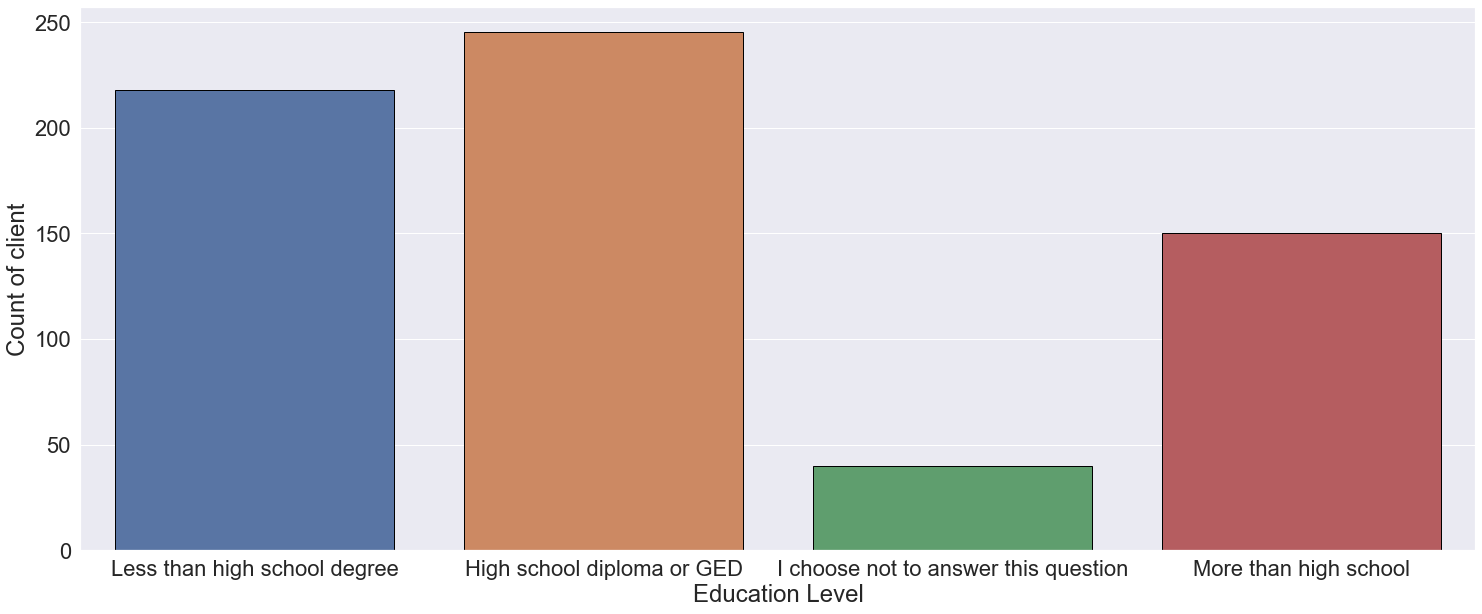

In [19]:
sns.set(font_scale=2)
sns.countplot(data=pra_new, x='Education',edgecolor = 'black')
plt.xlabel("Education Level")
plt.ylabel("Count of client")

print('Number of people who received Less than high school degree:' + str(len(pra_new[pra_new['Education'] == 'Less than high school degree'])) + '(' + str(np.round(218/653 *100, 2)) + '%)')
print('Number of people who received High school diploma or GED:' + str(len(pra_new[pra_new['Education'] == 'High school diploma or GED'])) + '(' + str(np.round(245/653 *100, 2)) + '%)')
print('Number of people who did not answer:' + str(len(pra_new[pra_new['Education'] == 'I choose not to answer this question'])) + '(' + str(np.round(40/653 *100, 2)) + '%)')
print('Number of people who received more than high school:' + str(len(pra_new[pra_new['Education'] == 'More than high school'])) + '(' + str(np.round(150/653 *100, 2)) + '%)')
print('More than 70% of people received education at high school or lower')

Number of people who are Unemployed and seeking work:150(22.97%)
Number of people who have Part-time or Temporary Work:32(4.9%)
Number of people who are Unemployed but not seeking work:409(62.63%)
Number of people who did not answer:45(6.89%)
Number of people who have Full time work:17(2.6%)
Based on the graph and data, there are more then 60 percent people who are consided as Discouraged worker


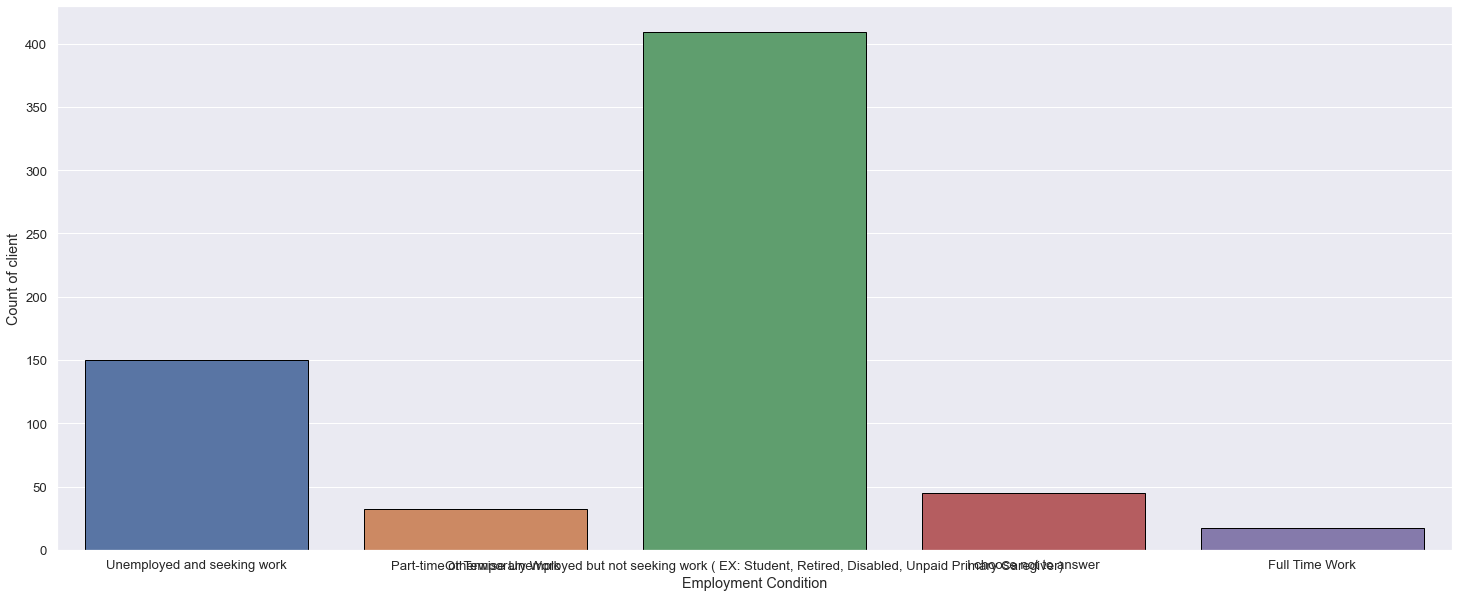

In [20]:
sns.set(font_scale=1.2)
sns.countplot(data=pra_new, x='Work',edgecolor = 'black')
plt.xlabel("Employment Condition")
plt.ylabel("Count of client")

# Blue: Unemployed and seeking work
# Brown: Part-time or Temporary Work
# Green: Otherwise Unemployed but not seeking work ( EX: Student, Retired, Disabled, Unpaid Primary Caregiver)
# Red: I choose not to answer
# Purple: Full Time Work

print('Number of people who are Unemployed and seeking work:' + str(len(pra_new[pra_new['Work'] == 'Unemployed and seeking work'])) + '(' + str(np.round(150/653 *100, 2)) + '%)')
print('Number of people who have Part-time or Temporary Work:' + str(len(pra_new[pra_new['Work'] == 'Part-time or Temporary Work'])) + '(' + str(np.round(32/653 *100, 2)) + '%)')
print('Number of people who are Unemployed but not seeking work:' + str(len(pra_new[pra_new['Work'] == 'Otherwise Unemployed but not seeking work ( EX: Student, Retired, Disabled, Unpaid Primary Caregiver)'])) + '(' + str(np.round(409/653 *100, 2)) + '%)')
print('Number of people who did not answer:' + str(len(pra_new[pra_new['Work'] == 'I choose not to answer'])) + '(' + str(np.round(45/653 *100, 2)) + '%)')
print('Number of people who have Full time work:' + str(len(pra_new[pra_new['Work'] == 'Full Time Work'])) + '(' + str(np.round(17/653 *100, 2)) + '%)')
print('Based on the graph and data, there are more then 60 percent people who are consided as Discouraged worker')

Number of people who received Less than $24,999:410(62.79%)
Number of people who received $25,000 - $49,999:88(13.48%)
Number of people who did not answer:150(22.97%)
Number of people who received more than $50,000:5(0.77%)
Consider the 2022 Federal Poverty Level, the average number of family member in PRAPARE is 0.89,
the poverty line is $13,590 and the low income level is $31,300.
Therefore, majority peole are considered as low income.


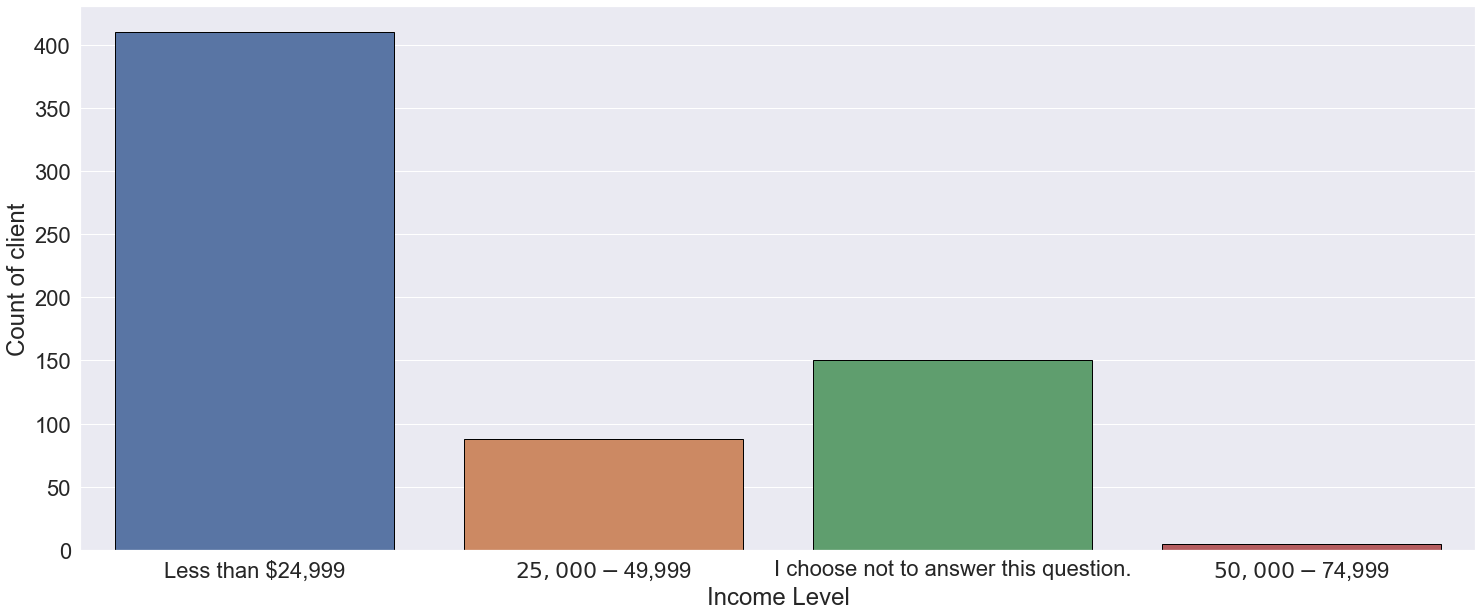

In [21]:
sns.set(font_scale=2)
sns.countplot(data=pra_new, x='Income',edgecolor = 'black')
plt.xlabel("Income Level")
plt.ylabel("Count of client")

print('Number of people who received Less than $24,999:' + str(len(pra_new[pra_new['Income'] == 'Less than $24,999'])) + '(' + str(np.round(410/653 *100, 2)) + '%)')
print('Number of people who received $25,000 - $49,999:' + str(len(pra_new[pra_new['Income'] == '$25,000 - $49,999'])) + '(' + str(np.round(88/653 *100, 2)) + '%)')
print('Number of people who did not answer:' + str(len(pra_new[pra_new['Income'] == 'I choose not to answer this question.'])) + '(' + str(np.round(150/653 *100, 2)) + '%)')
print('Number of people who received more than $50,000:' + str(len(pra_new[pra_new['Income'] == '$50,000 - $74,999'])) + '(' + str(np.round(5/653 *100, 2)) + '%)')
print('Consider the 2022 Federal Poverty Level, the average number of family member in PRAPARE is 0.89,\nthe poverty line is $13,590 and the low income level is $31,300.\nTherefore, majority peole are considered as low income.')

Focusing on the group of "No", the age distribution is almost same across gender


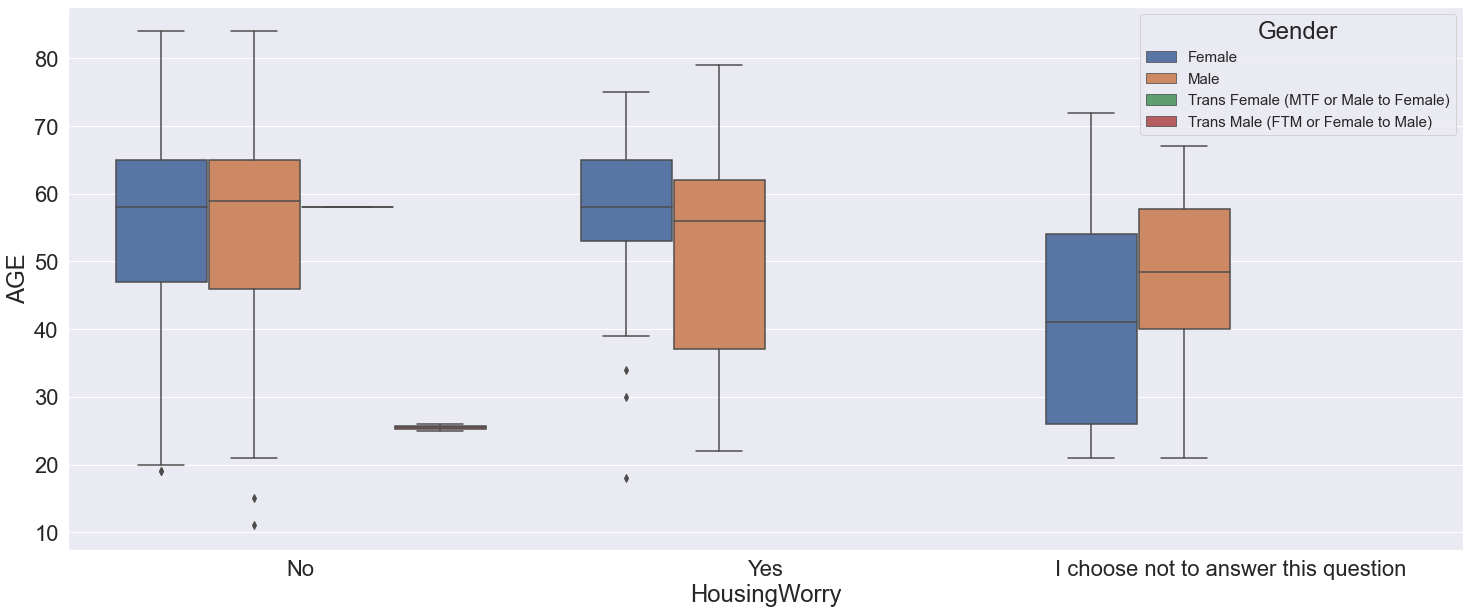

In [22]:
rcParams['figure.figsize'] = 25,10
sns.boxplot(data=pra_new , x="HousingWorry",y = "AGE", hue="GENDER")
plt.legend(title='Gender', loc='upper right', prop={'size': 15})
print('Focusing on the group of "No", the age distribution is almost same across gender')

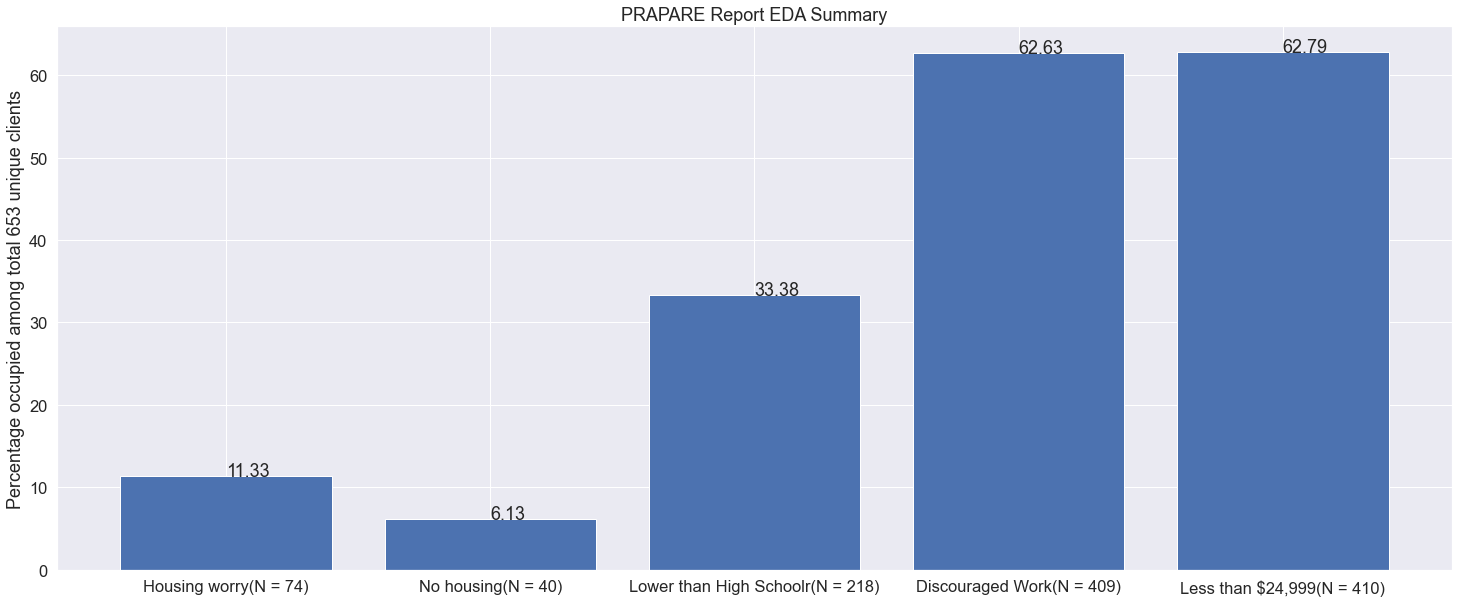

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
sns.set(font_scale=1.5)
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ["Housing worry(N = 74)", "No housing(N = 40)", "Lower than High Schoolr(N = 218)",
         "Discouraged Work(N = 409)", "Less than $24,999(N = 410)"]
    y = [11.33,6.13,33.38,62.63,62.79]
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("PRAPARE Report EDA Summary")
      
    # giving Y labels
    plt.ylabel("Percentage occupied among total 653 unique clients")
      
    # visualizing the plot
    plt.show()

## Part3 Deeper Analysis

##### 'Family Members' + 'Talk': people who have family members and are open to communication tend to bear less pressure
##### 'HousingWorry' + 'Work' + 'Income': stress and sense of safety can vary based on these categories often 

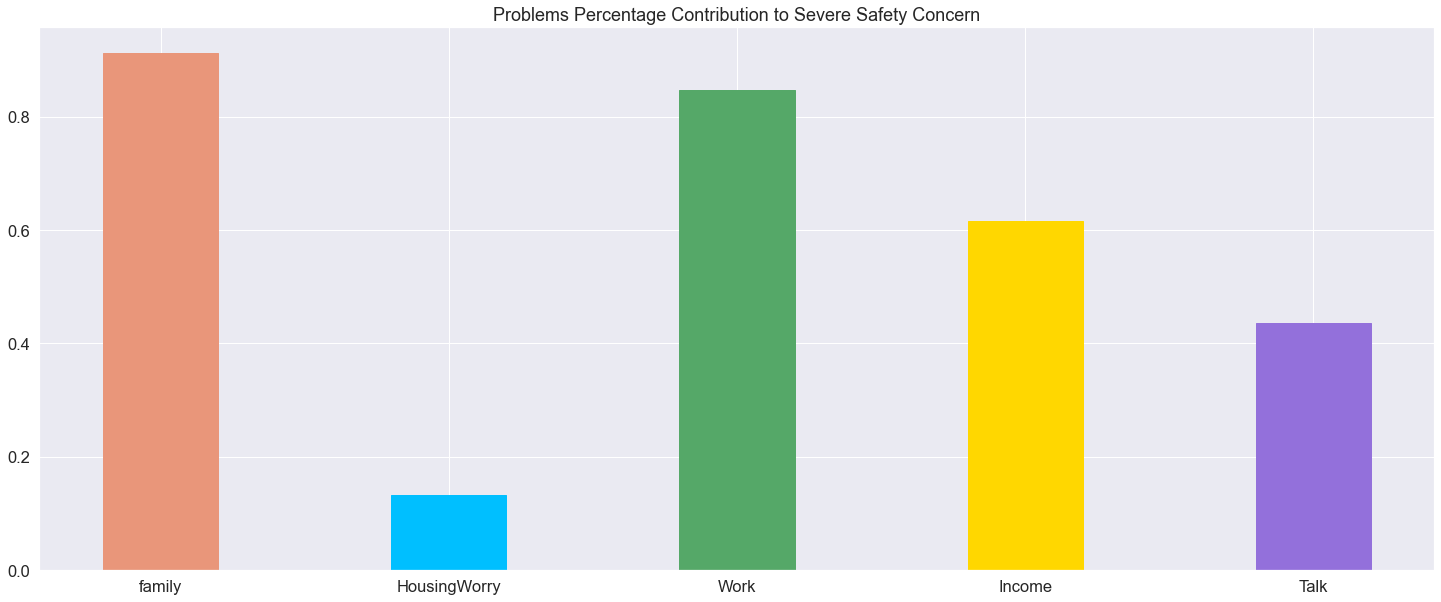

In [24]:
# plot the corresponding issues percentage that's under safety concerns

# Selecting people who have safety concern
# The bar represents the percentage contributed to the safety concern
total_n = len(df_safe)
y1 = sum(df_safe['family_num']==1)/total_n
y2 = sum(df_safe['HousingWorry_num']==1)/total_n
y3 = sum(df_safe['Work_num']==1)/total_n
y4 = sum(df_safe['Income_num']==1)/total_n
y5 = sum(df_safe['Talk_num']==1)/total_n
y_safe = [y1, y2, y3, y4, y5]
x = list(range(5))
barlist = plt.bar(x, y_safe, width = 0.4)
barlist[0].set_color('darksalmon')
barlist[1].set_color('deepskyblue')
barlist[2].set_color('g')
barlist[3].set_color('gold')
barlist[4].set_color('mediumpurple')
plt.title('Problems Percentage Contribution to Severe Safety Concern')
plt.xticks(x, ['family', 'HousingWorry', 'Work', 'Income', 'Talk'])
plt.show()

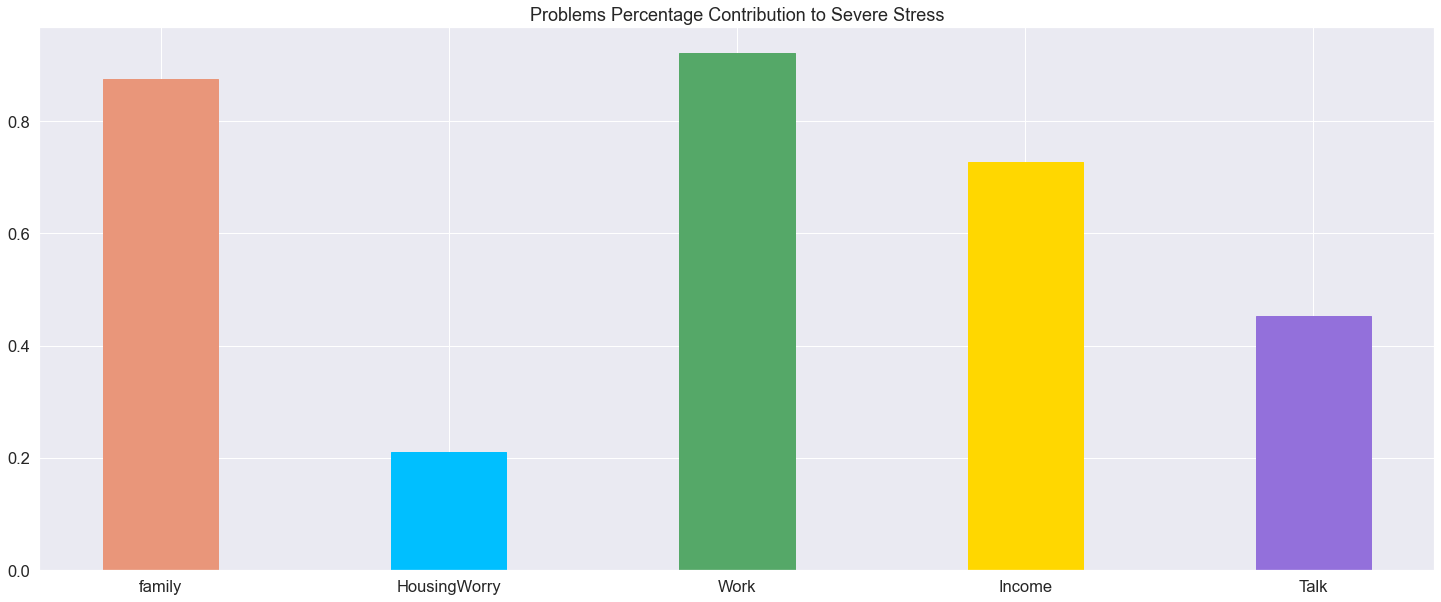

In [25]:
# plot the corresponding issues percentage that's under stress concerns 

# Selecting people who have stress concern
# The bar represents the percentage contributed to the stress concern
total_n = len(df_stress)
y1 = sum(df_stress['family_num']==1)/total_n
y2 = sum(df_stress['HousingWorry_num']==1)/total_n
y3 = sum(df_stress['Work_num']==1)/total_n
y4 = sum(df_stress['Income_num']==1)/total_n
y5 = sum(df_stress['Talk_num']==1)/total_n
y_stress = [y1, y2, y3, y4, y5]
x = list(range(5))
barlist = plt.bar(x, y_stress, width = 0.4)
barlist[0].set_color('darksalmon')
barlist[1].set_color('deepskyblue')
barlist[2].set_color('g')
barlist[3].set_color('gold')
barlist[4].set_color('mediumpurple')

plt.title('Problems Percentage Contribution to Severe Stress')
plt.xticks(x, ['family', 'HousingWorry', 'Work', 'Income', 'Talk'])
plt.show()

In [26]:
merge_housing

,Client ID,Last Name,First Name,HousingWorry_num,Work_num,Income_num,Talk_num,Stress_num,Safe_num,family_num,CLIENTID,CLIENTNAME,LOCATIONNAME,LOCATIONFIXED,LOCATIONSTARTDATE,TYPEFIXED,LOCATIONENDDATE
58,9817,PAGAN,VANESSA,1.0,1.0,1,0.0,0,1,1,9817.0,"PAGAN,VANESSA",ACT TEAM - Chapel Street,ACT TEAM - Chapel Street,2018-07-31,ACT,NaN
14,4551,PENA,MARIA,1.0,1.0,1,0.0,0,0,1,4551.0,"PENA,MARIA",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-10-21,SH,NaN
15,4553,ROSENBLATT,BONNIE,1.0,1.0,0,1.0,0,0,1,4553.0,"ROSENBLATT,BONNIE",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-10-22,SH,NaN
13,4538,TALBERT,ANDRE,1.0,1.0,1,0.0,0,0,1,4538.0,"TALBERT,ANDRE",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-12-08,SH,NaN
16,4558,ALBANO,RAYMOND,1.0,1.0,1,1.0,0,0,1,4558.0,"ALBANO,RAYMOND",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-12-21,SH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,15149,Yormark,Gary,1.0,1.0,1,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,15183,Rizzo,Allison,1.0,1.0,1,1.0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,15270,ROBERTSON,SHELLY,1.0,1.0,0,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,15515,MILES,WILLIAM,1.0,1.0,0,1.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
str(round(len(merge_housing[merge_housing['LOCATIONNAME'] == 'RTS'])/74,2)*100)

'15.0'

74 out of 653 people have serious housing worry. And 32(43.0%) of them are in SH. However RTS(CC/CM) has most 
people who have serious Housing Worry, which is 11(15.0%)


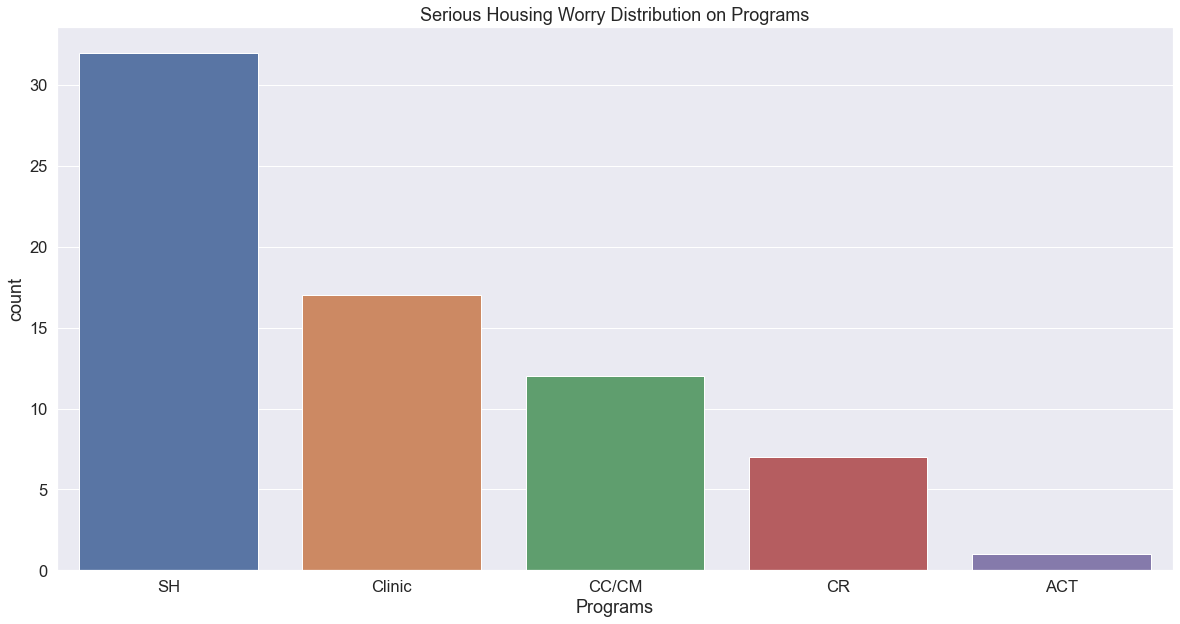

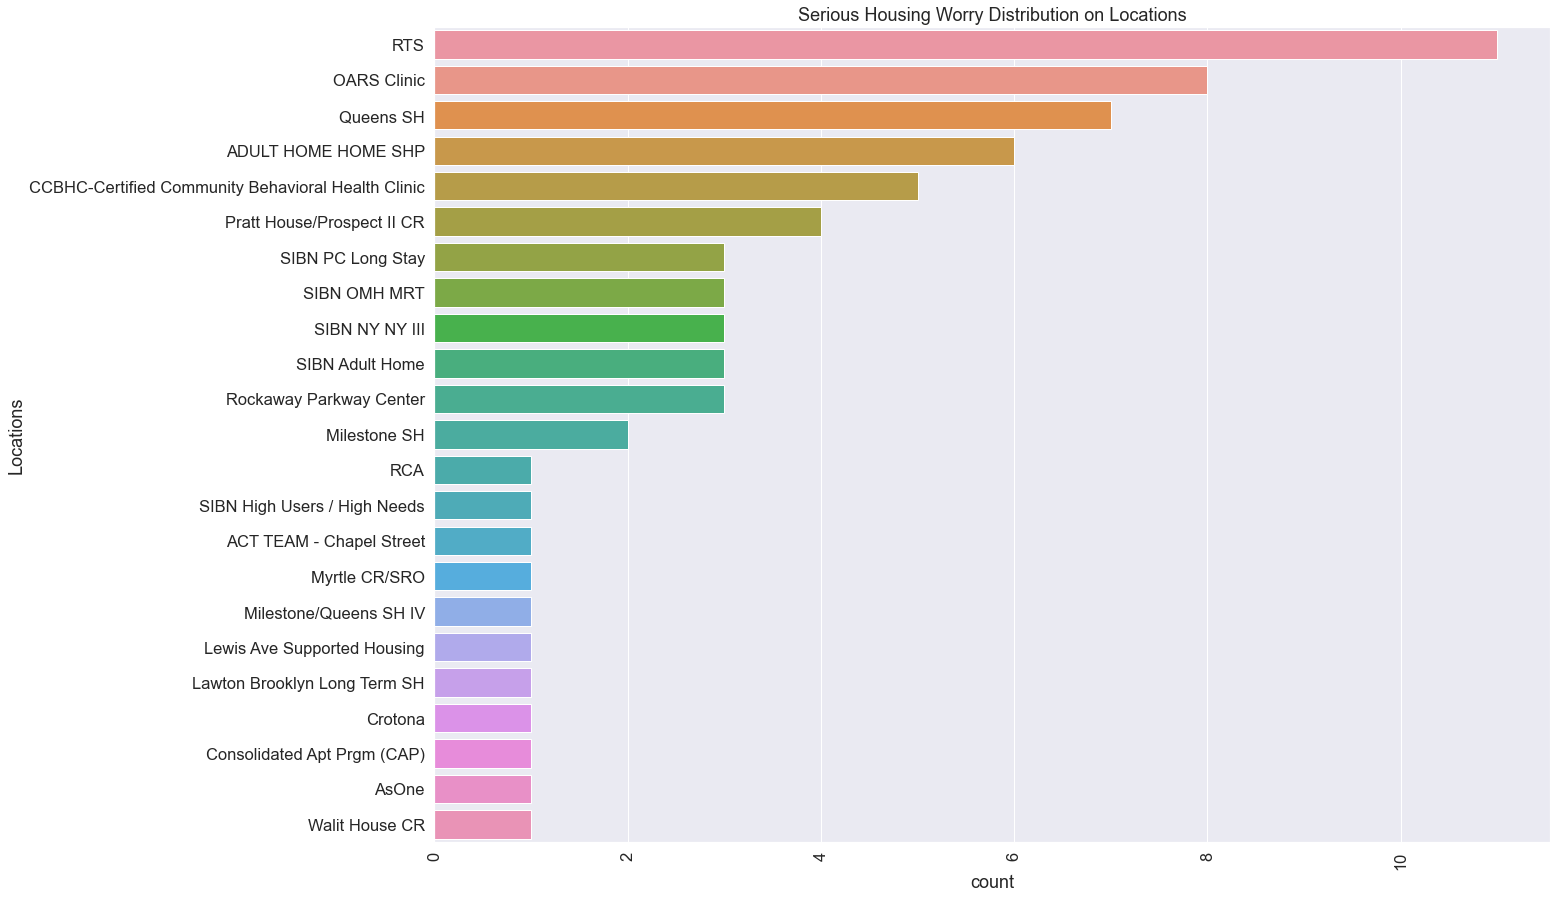

In [28]:
# For housing, show the portion of location and Type
tmp1_LOCATIONAME = merge_housing.groupby(['LOCATIONFIXED'])['LOCATIONFIXED'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_housing.groupby(['TYPEFIXED'])['TYPEFIXED'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print('74 out of 653 people have serious housing worry. And ' + str(len(merge_housing[merge_housing['TYPEFIXED'] == 'SH']))+
      '('+ str(round(len(merge_housing[merge_housing['TYPEFIXED'] == 'SH'])/74,2)*100)+'%) of them are in SH. However RTS(CC/CM) has most \npeople who have serious Housing Worry, which is '
     +str(len(merge_housing[merge_housing['LOCATIONFIXED'] == 'RTS'])) +'('+str(round(len(merge_housing[merge_housing['LOCATIONFIXED'] == 'RTS'])/74,2)*100)+'%)')

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
tmp1_Type['TYPEFIXED'] = tmp1_Type['TYPEFIXED'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="TYPEFIXED", y="count")
plt.xlabel('Programs')
plt.title('Serious Housing Worry Distribution on Programs')
plt.show()

rcParams['figure.figsize'] = 20,15
ax = sns.barplot( y="LOCATIONFIXED", x="count",data=tmp1_LOCATIONAME,)
plt.xticks(rotation=90)
plt.ylabel('Locations')
plt.title('Serious Housing Worry Distribution on Locations')
plt.show()


559 out of 653 people have serious work problem. And 281(50.0%) of them are in SH. However RTS(CC/CM) has most 
people who have serious work problem, which is 70(13.0%)


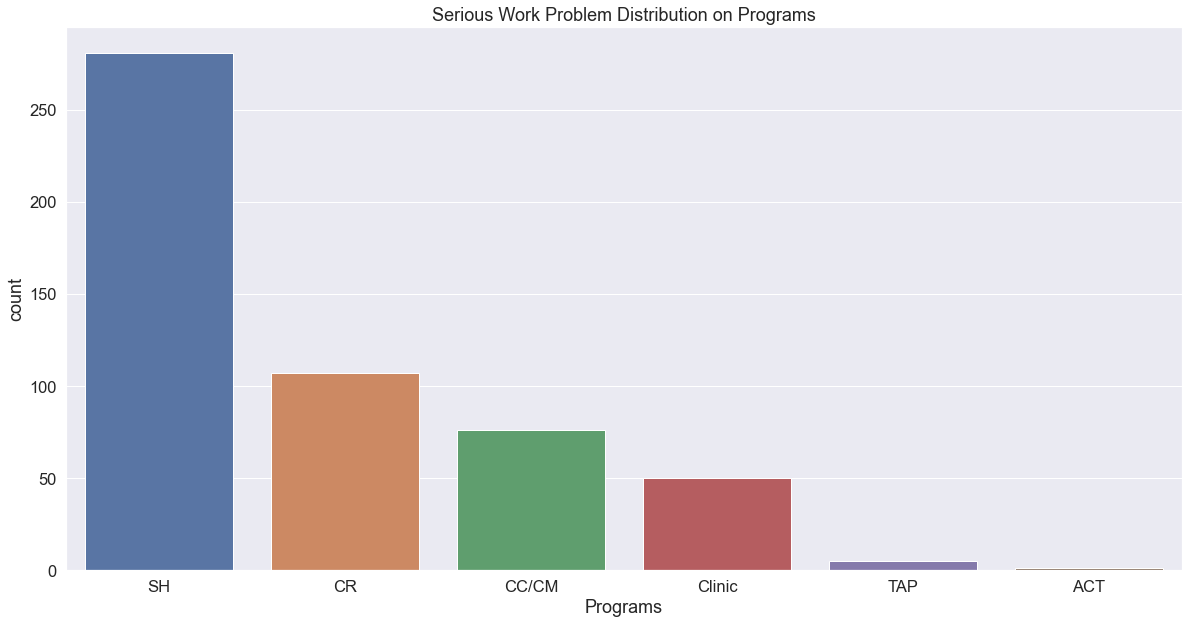

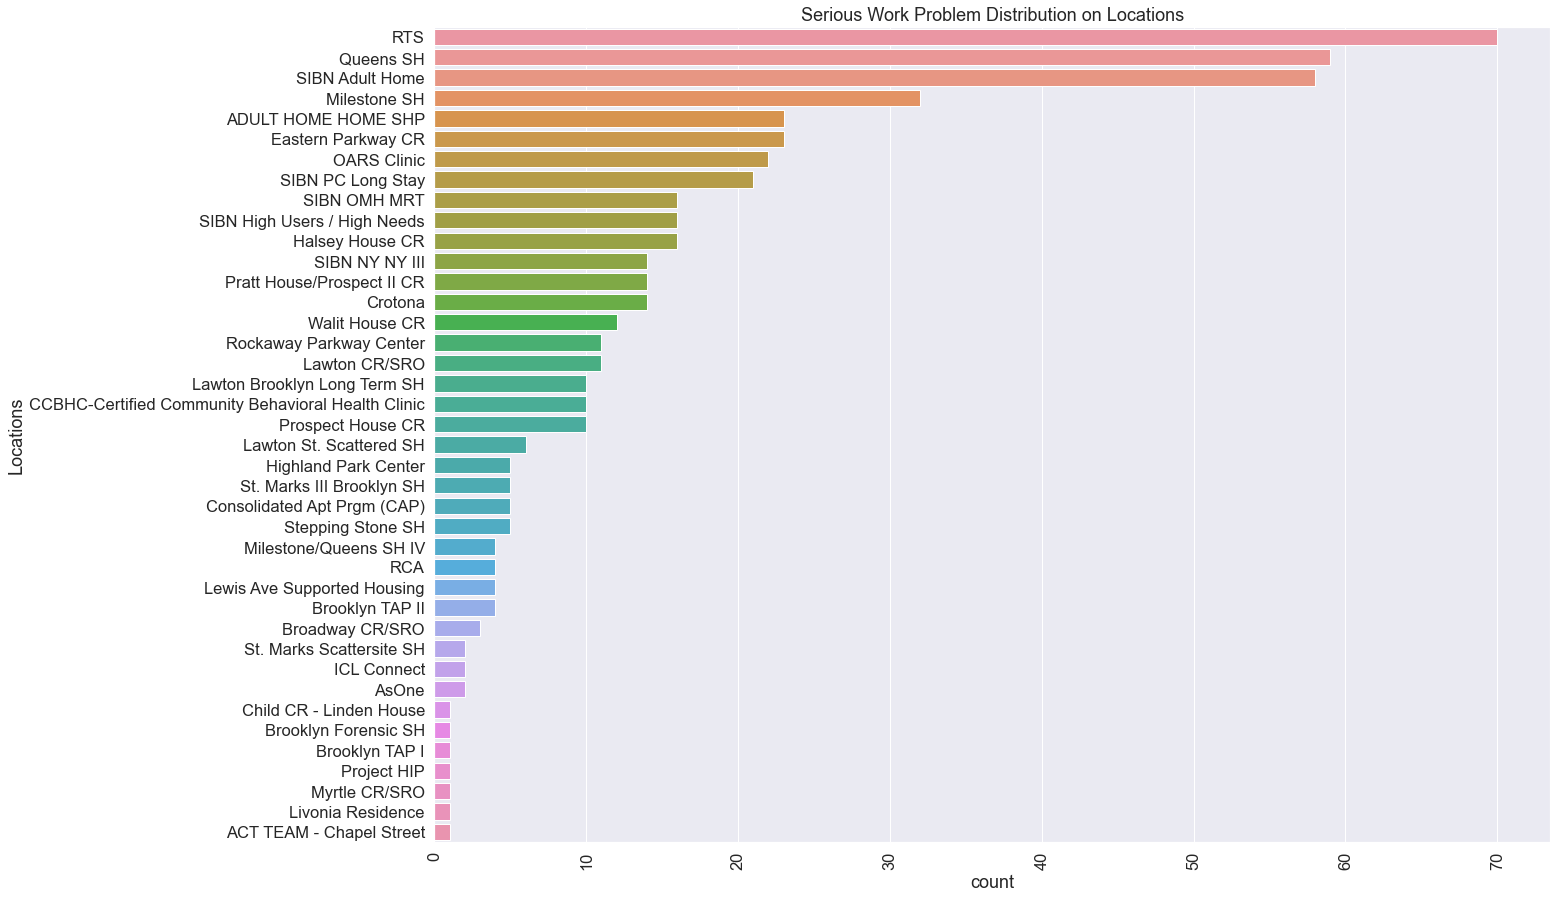

In [29]:
# For work
tmp1_LOCATIONAME = merge_work.groupby(['LOCATIONFIXED'])['LOCATIONFIXED'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_work.groupby(['TYPEFIXED'])['TYPEFIXED'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart
print('559 out of 653 people have serious work problem. And ' + str(len(merge_work[merge_work['TYPEFIXED'] == 'SH']))+
      '('+ str(round(len(merge_work[merge_work['TYPEFIXED'] == 'SH'])/559,2)*100)+'%) of them are in SH. However RTS(CC/CM) has most \npeople who have serious work problem, which is '
     +str(len(merge_work[merge_work['LOCATIONFIXED'] == 'RTS'])) +'('+str(round(len(merge_work[merge_work['LOCATIONFIXED'] == 'RTS'])/559,2)*100)+'%)')

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
tmp1_Type['TYPEFIXED'] = tmp1_Type['TYPEFIXED'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="TYPEFIXED", y="count")
plt.xlabel('Programs')
plt.title('Serious Work Problem Distribution on Programs')
plt.show()

rcParams['figure.figsize'] = 20,15
ax = sns.barplot( y="LOCATIONFIXED", x="count",data=tmp1_LOCATIONAME,)
plt.xticks(rotation=90)
plt.ylabel('Locations')
plt.title('Serious Work Problem Distribution on Locations')
plt.show()

410 out of 653 people have serious income problem. And 229(56.00000000000001%) of them are in SH. 
And among all SH programs, SIBN Adult Home has most people who have serious income problem, which is 51(22.0%) out of 229 people in SH


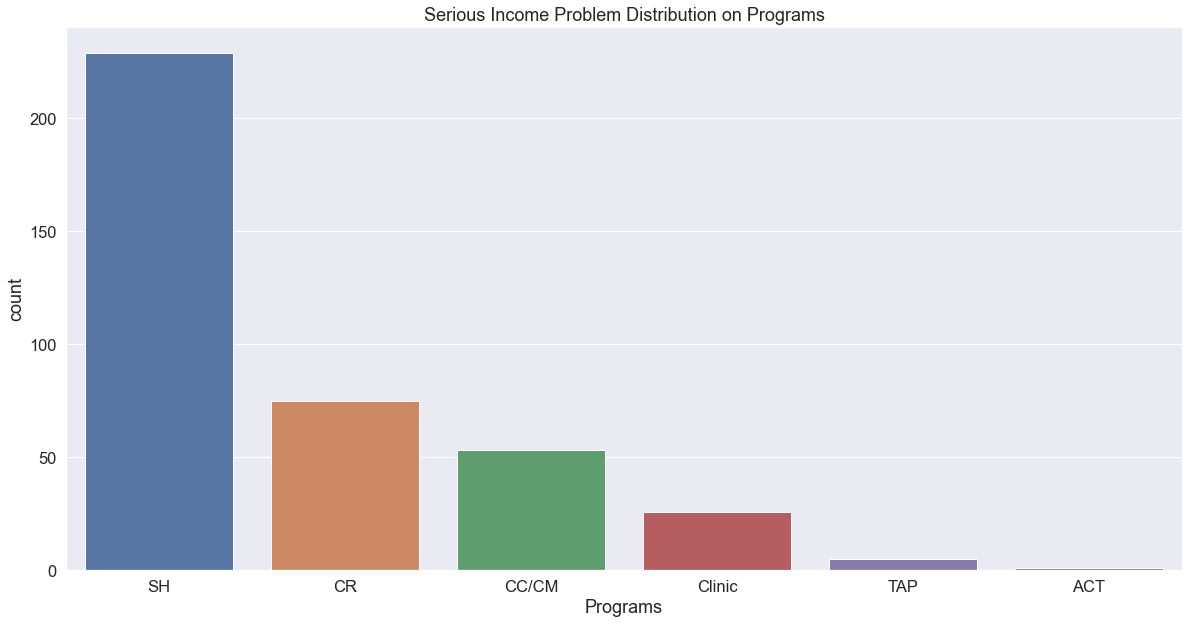

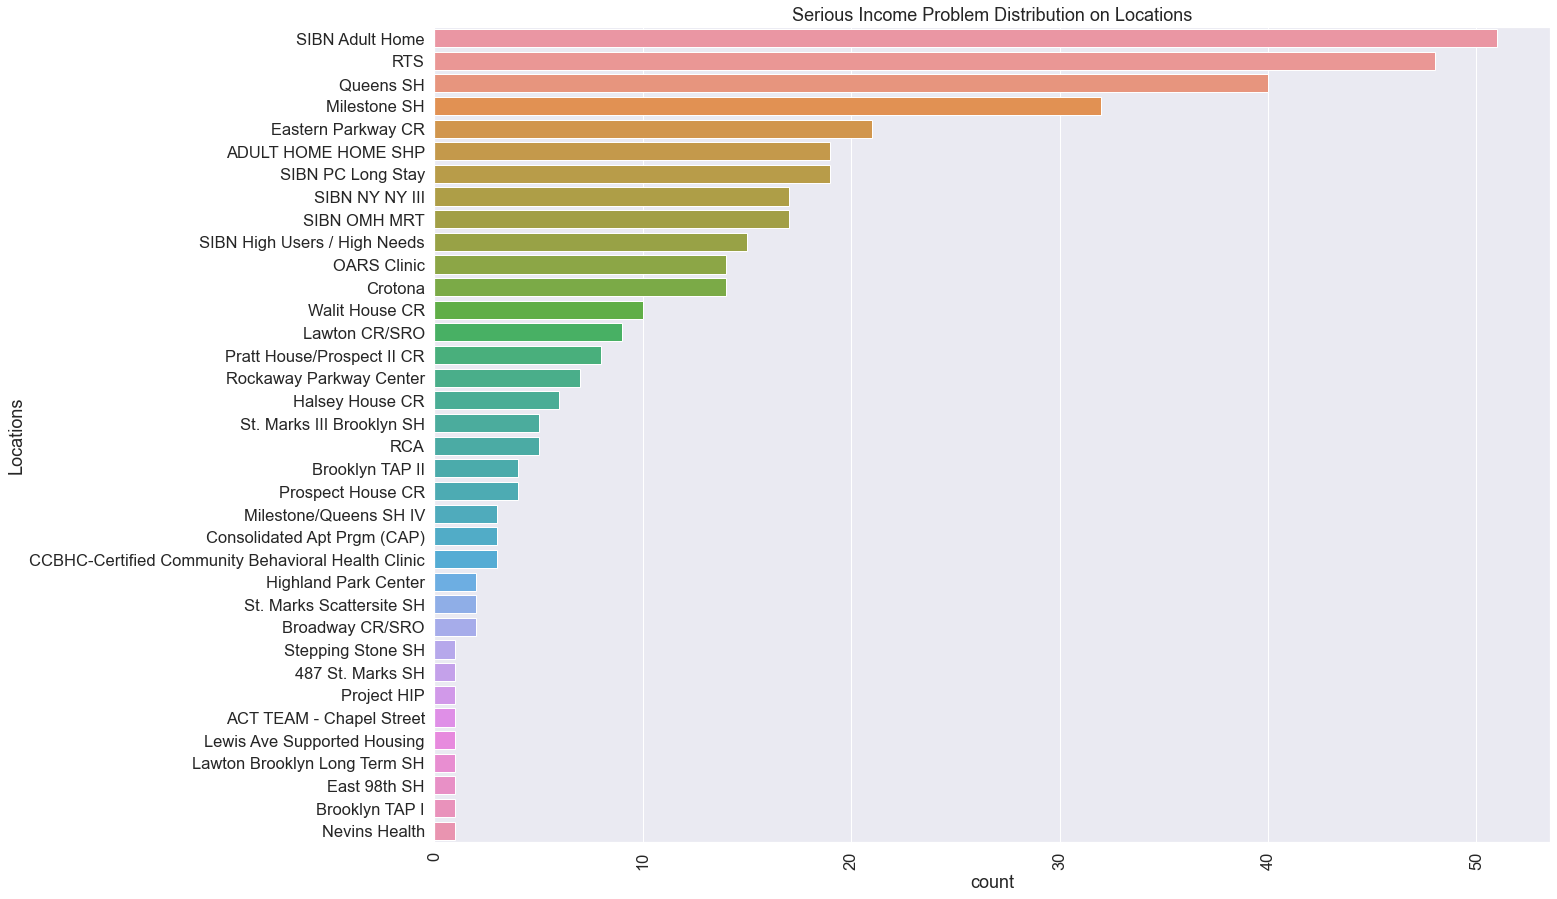

In [30]:
# For Income
tmp1_LOCATIONAME = merge_income.groupby(['LOCATIONFIXED'])['LOCATIONFIXED'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_income.groupby(['TYPEFIXED'])['TYPEFIXED'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart
print('410 out of 653 people have serious income problem. And ' + str(len(merge_income[merge_income['TYPEFIXED'] == 'SH']))+
      '('+ str(round(len(merge_income[merge_income['TYPEFIXED'] == 'SH'])/410,2)*100)+'%) of them are in SH. \nAnd among all SH programs, SIBN Adult Home has most people who have serious income problem, which is '
     +str(len(merge_income[merge_income['LOCATIONFIXED'] == 'SIBN Adult Home'])) +'('+str(round(len(merge_income[merge_income['LOCATIONFIXED'] == 'SIBN Adult Home'])/229,2)*100)+'%) out of 229 people in SH')

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
tmp1_Type['TYPEFIXED'] = tmp1_Type['TYPEFIXED'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="TYPEFIXED", y="count")
plt.xlabel('Programs')
plt.title('Serious Income Problem Distribution on Programs')
plt.show()

rcParams['figure.figsize'] = 20,15
ax = sns.barplot( y="LOCATIONFIXED", x="count",data=tmp1_LOCATIONAME,)
plt.xticks(rotation=90)
plt.ylabel('Locations')
plt.title('Serious Income Problem Distribution on Locations')
plt.show()

294 out of 653 people have serious communication problem. And 149(51.0%) of them are in SH. 
However RTS(CC/CM) has most people who have serious communication problem, which is 42(14.000000000000002%)


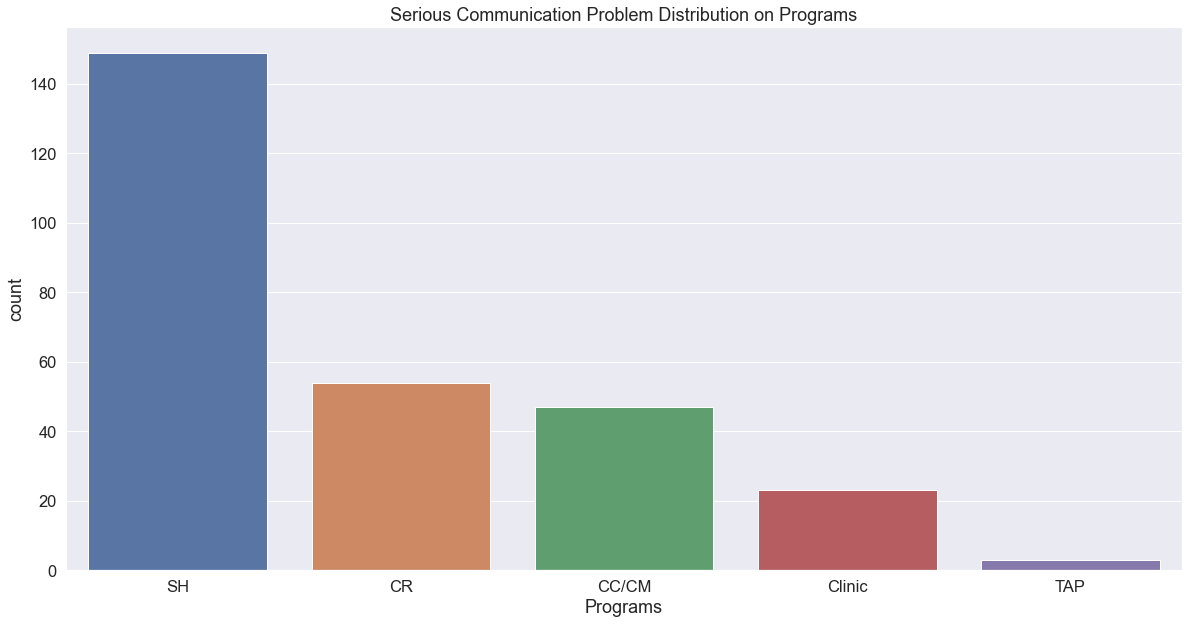

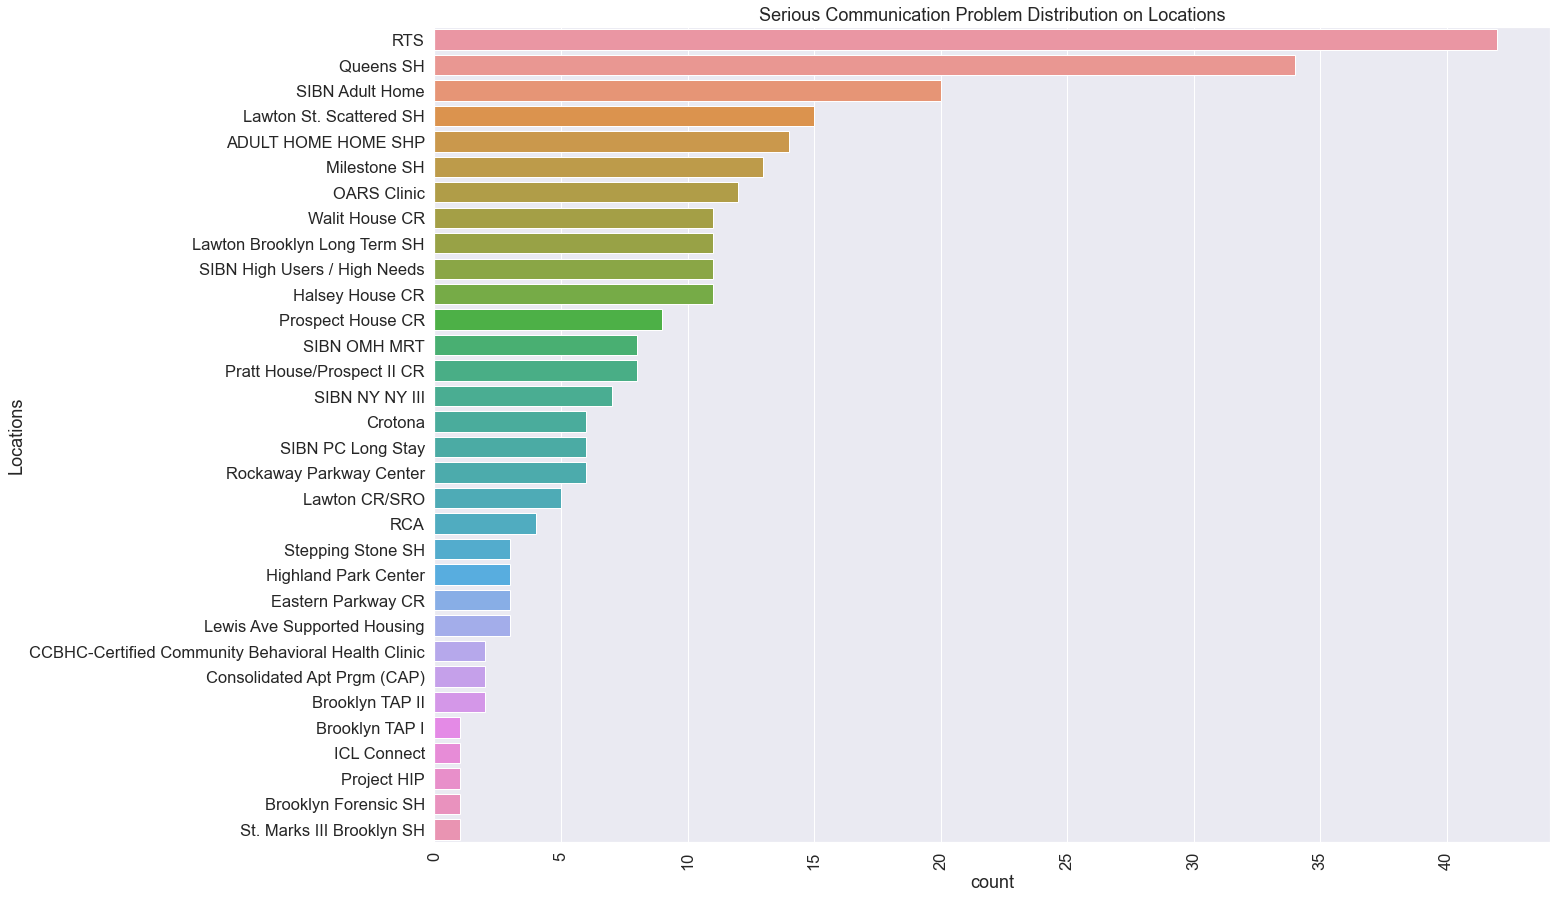

In [31]:
# For Talk
tmp1_LOCATIONAME = merge_talk.groupby(['LOCATIONFIXED'])['LOCATIONFIXED'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_talk.groupby(['TYPEFIXED'])['TYPEFIXED'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart

print('294 out of 653 people have serious communication problem. And ' + str(len(merge_talk[merge_talk['TYPEFIXED'] == 'SH']))+
      '('+ str(round(len(merge_talk[merge_talk['TYPEFIXED'] == 'SH'])/294,2)*100)+'%) of them are in SH. \nHowever RTS(CC/CM) has most people who have serious communication problem, which is '
     +str(len(merge_talk[merge_talk['LOCATIONFIXED'] == 'RTS'])) +'('+str(round(len(merge_talk[merge_talk['LOCATIONFIXED'] == 'RTS'])/294,2)*100)+'%)')


from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
tmp1_Type['TYPEFIXED'] = tmp1_Type['TYPEFIXED'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="TYPEFIXED", y="count")
plt.xlabel('Programs')
plt.title('Serious Communication Problem Distribution on Programs')
plt.show()

rcParams['figure.figsize'] = 20,15
ax = sns.barplot( y="LOCATIONFIXED", x="count",data=tmp1_LOCATIONAME,)
plt.xticks(rotation=90)
plt.ylabel('Locations')
plt.title('Serious Communication Problem Distribution on Locations')
plt.show()

128 out of 653 people have serious stress problem. And 69(54.0%) of them are in SH. 
However OARS - Clinic has most people who have serious stress problem, which is 14(11.0%)


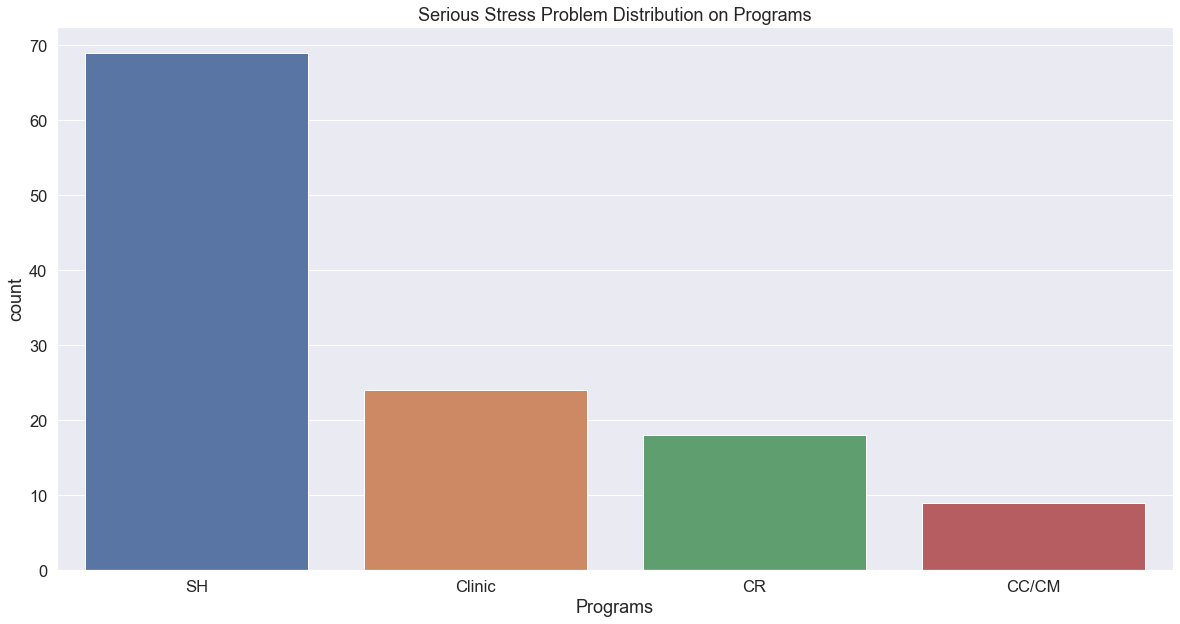

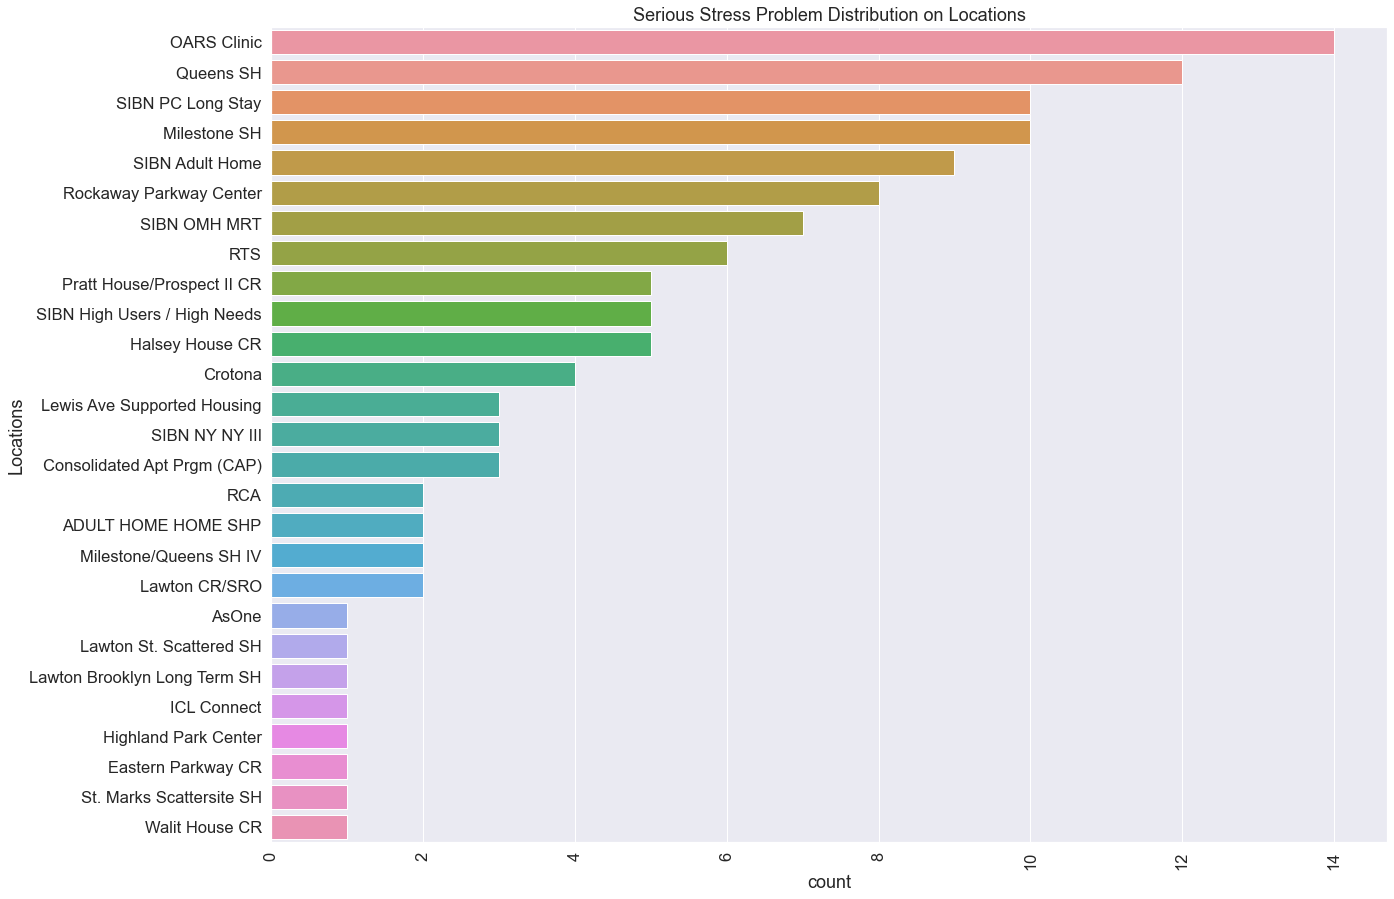

In [32]:
# For Stress
tmp1_LOCATIONAME = merge_stress.groupby(['LOCATIONFIXED'])['LOCATIONFIXED'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_stress.groupby(['TYPEFIXED'])['TYPEFIXED'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart

print('128 out of 653 people have serious stress problem. And ' + str(len(merge_stress[merge_stress['TYPEFIXED'] == 'SH']))+
      '('+ str(round(len(merge_stress[merge_stress['TYPEFIXED'] == 'SH'])/128,2)*100)+'%) of them are in SH. \nHowever OARS - Clinic has most people who have serious stress problem, which is '
     +str(len(merge_stress[merge_stress['LOCATIONFIXED'] == 'OARS Clinic'])) +'('+str(round(len(merge_stress[merge_stress['LOCATIONFIXED'] == 'OARS Clinic'])/128,2)*100)+'%)')


from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
tmp1_Type['TYPEFIXED'] = tmp1_Type['TYPEFIXED'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="TYPEFIXED", y="count")
plt.xlabel('Programs')
plt.title('Serious Stress Problem Distribution on Programs')
plt.show()

rcParams['figure.figsize'] = 20,15
ax = sns.barplot( y="LOCATIONFIXED", x="count",data=tmp1_LOCATIONAME,)
plt.xticks(rotation=90)
plt.ylabel('Locations')
plt.title('Serious Stress Problem Distribution on Locations')
plt.show()

195 out of 653 people have serious Safety Worry. And 107(55.00000000000001%) of them are in SH. 
And Queens SH has most people who have serious Safety Worry, which is 35(33.0%) among 107 people in SH


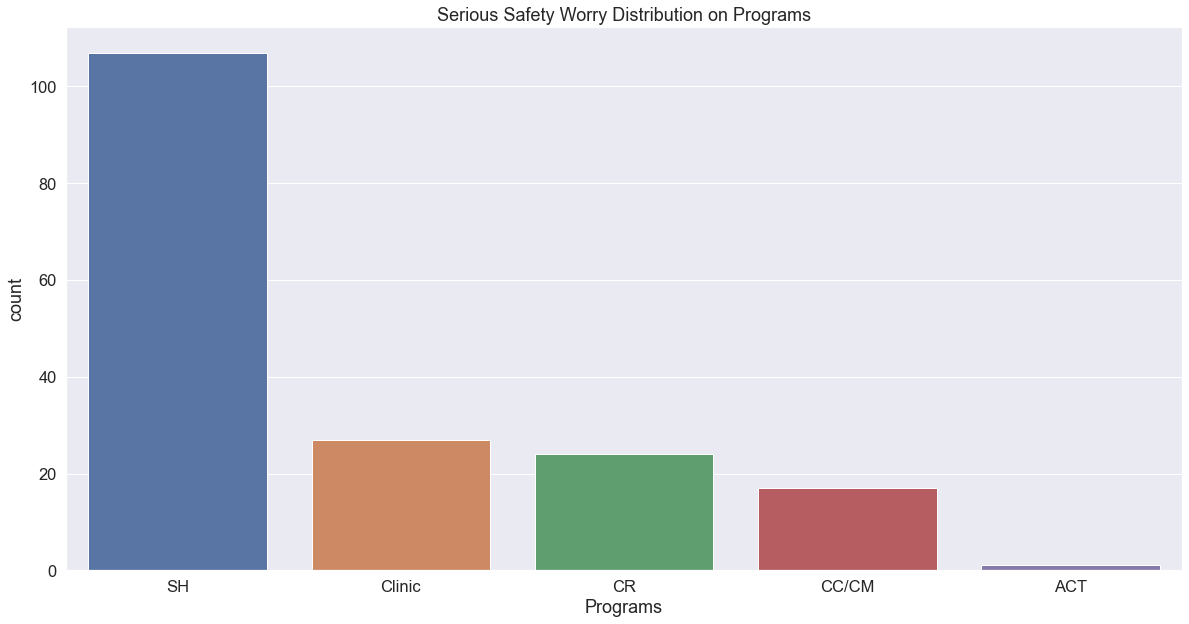

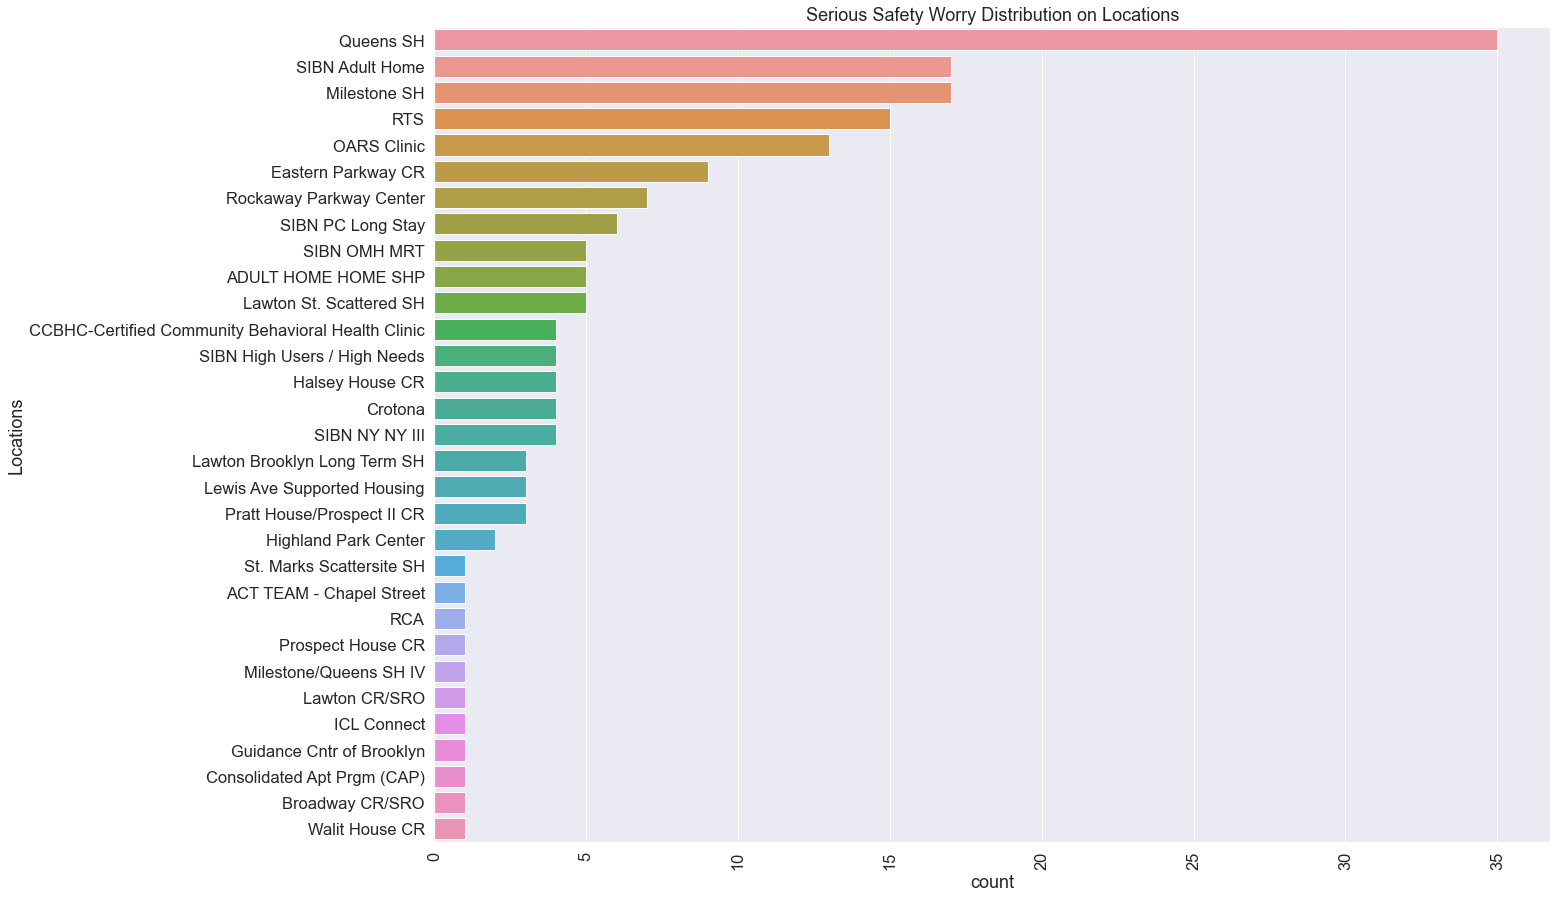

In [33]:
# For Safety
tmp1_LOCATIONAME = merge_safe.groupby(['LOCATIONFIXED'])['LOCATIONFIXED'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_safe.groupby(['TYPEFIXED'])['TYPEFIXED'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart

print('195 out of 653 people have serious Safety Worry. And ' + str(len(merge_safe[merge_safe['TYPEFIXED'] == 'SH']))+
      '('+ str(round(len(merge_safe[merge_safe['TYPEFIXED'] == 'SH'])/195,2)*100)+'%) of them are in SH. \nAnd Queens SH has most people who have serious Safety Worry, which is '
     +str(len(merge_safe[merge_safe['LOCATIONFIXED'] == 'Queens SH'])) +'('+str(round(len(merge_safe[merge_safe['LOCATIONFIXED'] == 'Queens SH'])/107,2)*100)+'%) among 107 people in SH')

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
tmp1_Type['TYPEFIXED'] = tmp1_Type['TYPEFIXED'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="TYPEFIXED", y="count")
plt.xlabel('Programs')
plt.title('Serious Safety Worry Distribution on Programs')
plt.show()

rcParams['figure.figsize'] = 20,15
ax = sns.barplot( y="LOCATIONFIXED", x="count",data=tmp1_LOCATIONAME,)
plt.xticks(rotation=90)
plt.ylabel('Locations')
plt.title('Serious Safety Worry Distribution on Locations')
plt.show()

594 out of 653 people have rare family member. And 331(56.00000000000001%) of them are in SH. 
However RTS(CC/CM) has most people who have rare family member, which is 74(12.0%)


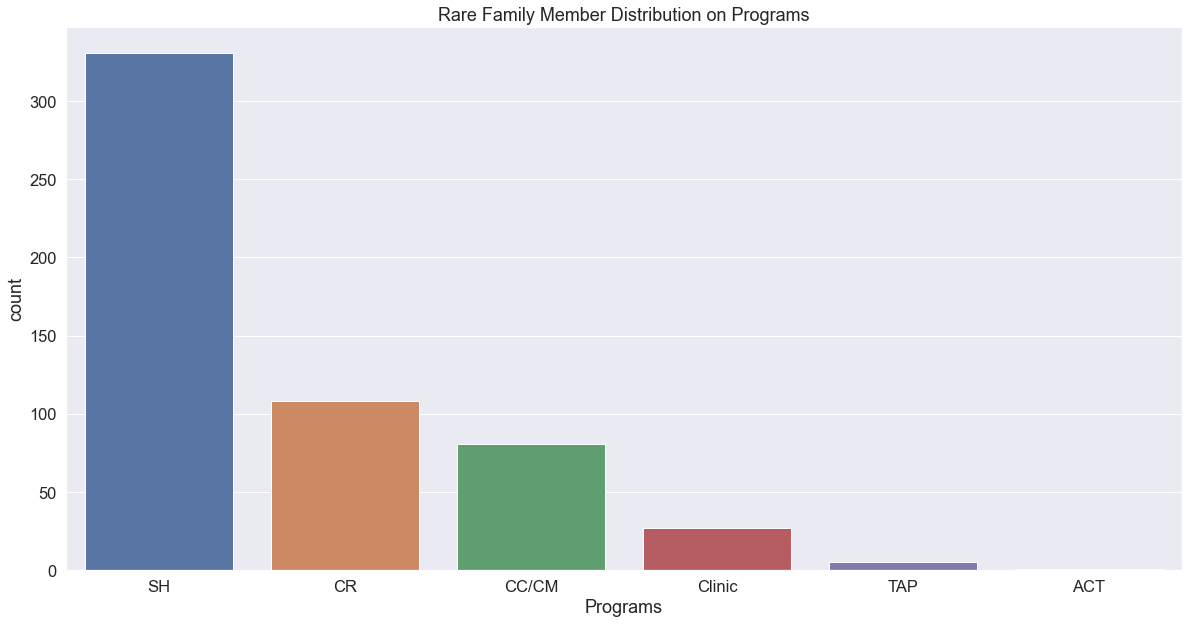

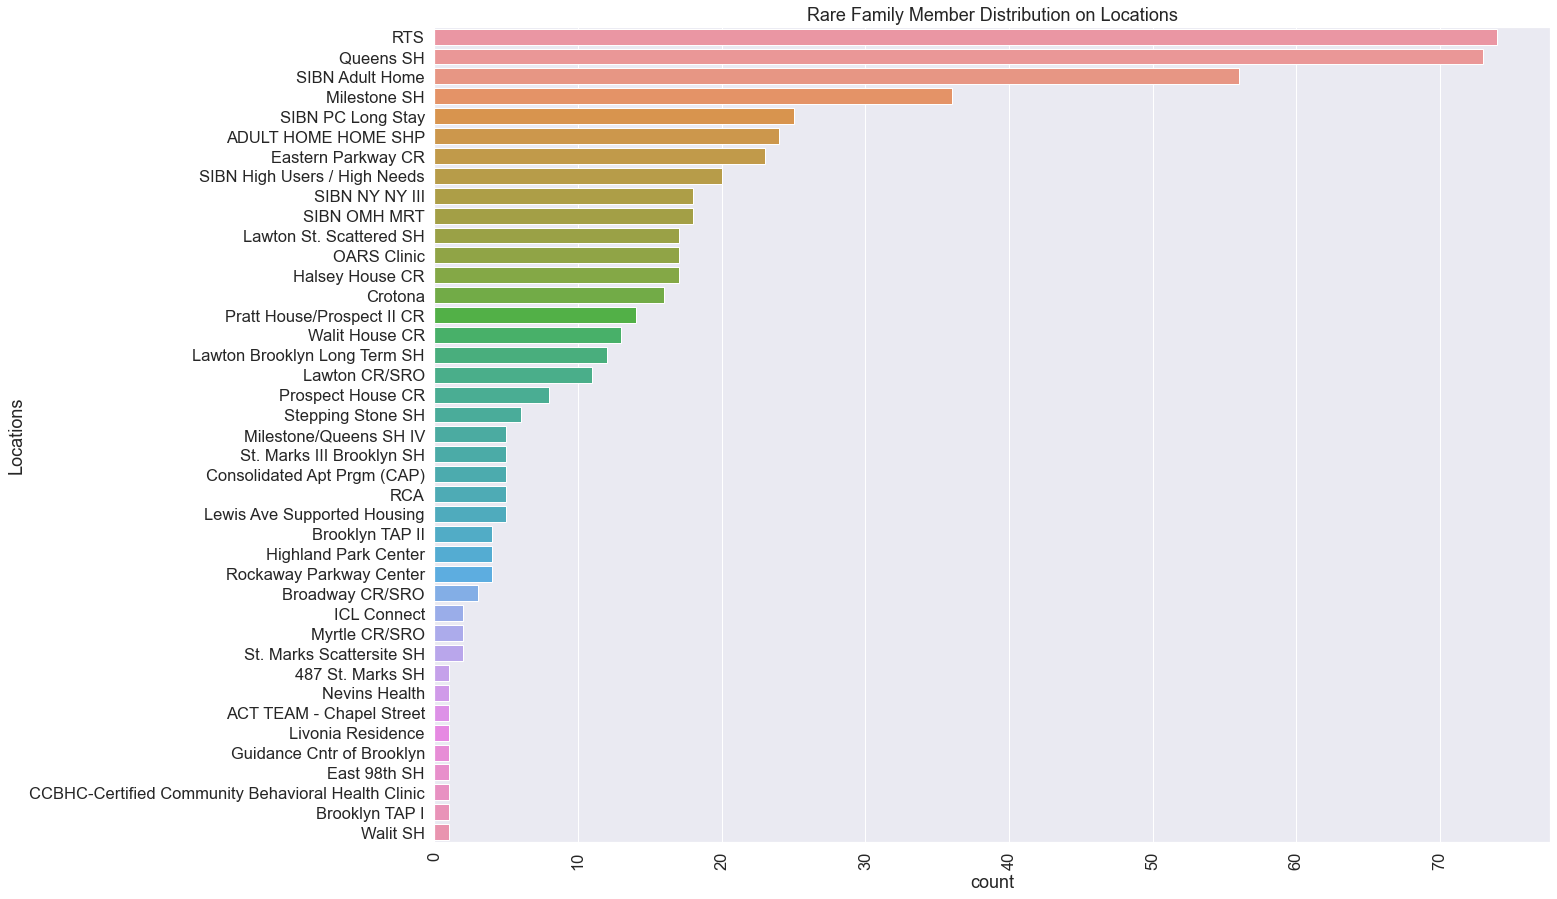

Overall, Supportive Housing dominats people have serious problems, and RTS is one of the specific program locations have most people who have serious problems


In [34]:
# For Family
tmp1_LOCATIONAME = merge_family.groupby(['LOCATIONFIXED'])['LOCATIONFIXED'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_family.groupby(['TYPEFIXED'])['TYPEFIXED'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart

print('594 out of 653 people have rare family member. And ' + str(len(merge_family[merge_family['TYPEFIXED'] == 'SH']))+
      '('+ str(round(len(merge_family[merge_family['TYPEFIXED'] == 'SH'])/594,2)*100)+'%) of them are in SH. \nHowever RTS(CC/CM) has most people who have rare family member, which is '
     +str(len(merge_family[merge_family['LOCATIONFIXED'] == 'RTS'])) +'('+str(round(len(merge_family[merge_family['LOCATIONFIXED'] == 'RTS'])/594,2)*100)+'%)')

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
tmp1_Type['TYPEFIXED'] = tmp1_Type['TYPEFIXED'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="TYPEFIXED", y="count")
plt.xlabel('Programs')
plt.title('Rare Family Member Distribution on Programs')
plt.show()

rcParams['figure.figsize'] = 20,15
ax = sns.barplot( y="LOCATIONFIXED", x="count",data=tmp1_LOCATIONAME,)
plt.xticks(rotation=90)
plt.ylabel('Locations')
plt.title('Rare Family Member Distribution on Locations')
plt.show()
print('Overall, Supportive Housing dominats people have serious problems, and RTS is one of the specific program locations have most people who have serious problems')

#### Reference 
https://www.parents.com/parenting/better-parenting/style/generation-names-and-years-a-cheat-sheet-for-parents/
https://seaborn.pydata.org/tutorial/introduction
https://www.nyrentownsell.com/blog/how-to-qualify-for-low-income-housing/